# Analyses and Figures

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as scs
from statsmodels.stats.descriptivestats import sign_test

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
import seaborn as sns

In [2]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

max_iter = 350000

In [3]:
import os
import hypervolumes as hv

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [4]:
fpath_dir = "/work/users/mtorrassa/biofire-idh/data_new/"

In [5]:
# sns.set_theme(context="paper", style="whitegrid", font_scale=1.5, rc={"lines.linewidth": 2})
# mpl.rcParams.update({'font.size': 30})
# dpi = 300
# transparent = False

sns.set_theme(context="paper", style="whitegrid", font_scale=1.3, rc={"lines.linewidth": 2})
mpl.rcParams.update({'font.size': 30})
dpi=300
transparent=True

## Realizing the plots

### Hypervolume representation (Fig. S2)

In [6]:
biome, N ='med', 50

Cmin, Cmax = 0.0, 0.3 # 0.0, 22.5
Mmin, Mmax = 0.0, 0.1 # 0.0, 2.1
Lmin, Lmax = 0.002, 0.5

list_dim = ['C','R','L']

In [7]:
df2 = pd.read_csv(os.path.join(fpath_dir, 'coms-fire-bioindex-fd.csv'))
df2[(df2['N']==N)&(df2['biome']==biome) & (df2['srichness']>8)]#.sort_values('frichness')

Unnamed: 0.1  Unnamed: 0 biome   N  ncom  init        frt  srichness  \
50508         50508        1543   med  50   430    36  12.019231          9   
50522         50522        1558   med  50   430    51  11.682243          9   
53633         53633        1317   med  50   526    18  28.735632          9   
53655         53655        1339   med  50   526    40  35.460995          9   
64242         64242        2032   med  50   840     5  27.027027          9   
64268         64268        2058   med  50   840    31  25.380711          9   
64286         64286        2076   med  50   840    49  28.409090          9   
64289         64289        2079   med  50   840    52  29.069767          9   
67384         67384        1665   med  50   933     2  20.746887          9   
67420         67420        1701   med  50   933    38  20.576132          9   
67643         67643        2008   med  50   939    33  68.493149          9   

       isimpson  frichness  fdivergence  
50508  4.071693   0.123395     0.364592  
50522  3.780324   0.110403     0.340712  
53633  5.509084   0.133963     0.257244  
53655  6.239466   0.073784     0.231289  
64242  4.188709   0.037262     0.215191  
64268  4.399095   0.041713     0.220949  
64286  4.452484   0.043005     0.229251  
64289  4.307620   0.032315     0.197700  
67384  5.937909   0.188318     0.399330  
67420  5.839493   0.175034     0.388379  
67643  3.895165   0.096278     0.368163

In [44]:
df2[(df2['N']==N)&(df2['biome']==biome)&(df2['ncom']==430)].sort_values('frichness')

Unnamed: 0.1  Unnamed: 0 biome   N  ncom  init        frt  srichness  \
50476         50476        1511   med  50   430     4  10.040160          4   
50485         50485        1520   med  50   430    13  10.416667          6   
50502         50502        1537   med  50   430    30  10.373444          5   
50488         50488        1523   med  50   430    16  10.183299          5   
50489         50489        1524   med  50   430    17  10.000000          5   
50504         50504        1539   med  50   430    32   9.560229          5   
50503         50503        1538   med  50   430    31  10.460251          5   
50483         50483        1518   med  50   430    11  10.141988          5   
50475         50475        1510   med  50   430     3  10.460251          5   
50506         50506        1541   med  50   430    34  10.040160          5   
50498         50498        1533   med  50   430    26  10.245902          5   
50497         50497        1532   med  50   430    25  10.373444          5   
50516         50516        1551   med  50   430    44   9.940358          5   
50493         50493        1528   med  50   430    21  10.101010          5   
50510         50510        1545   med  50   430    38  10.204081          5   
50509         50509        1544   med  50   430    37  10.141988          5   
50486         50486        1521   med  50   430    14  10.040160          5   
50496         50496        1531   med  50   430    24  10.224949          5   
50515         50515        1550   med  50   430    43  10.040160          5   
50480         50480        1515   med  50   430     8  10.060362          5   
50474         50474        1509   med  50   430     2  10.162601          5   
50520         50520        1555   med  50   430    48  10.060362          5   
50477         50477        1512   med  50   430     5   9.960159          4   
50507         50507        1542   med  50   430    35  10.040160          4   
50518         50518        1553   med  50   430    46  10.000000          4   
50519         50519        1554   med  50   430    47  10.183299          5   
50512         50512        1547   med  50   430    40  10.183299          5   
50484         50484        1519   med  50   430    12  10.101010          5   
50491         50491        1526   med  50   430    19   9.689922          5   
50490         50490        1525   med  50   430    18   9.900990          4   
50500         50500        1535   med  50   430    28   9.980040          5   
50492         50492        1527   med  50   430    20   9.881423          5   
50499         50499        1534   med  50   430    27   9.940358          5   
50517         50517        1552   med  50   430    45  10.000000          5   
50505         50505        1540   med  50   430    33   9.803922          5   
50494         50494        1529   med  50   430    22  10.438414          5   
50487         50487        1522   med  50   430    15  10.482181          5   
50473         50473        1508   med  50   430     1  10.309278          5   
50501         50501        1536   med  50   430    29  10.526316          5   
50523         50523        1559   med  50   430    52  10.183299          5   
50495         50495        1530   med  50   430    23  10.438414          5   
50513         50513        1548   med  50   430    41   8.896797          4   
50514         50514        1549   med  50   430    42  10.615711          5   
50511         50511        1546   med  50   430    39  10.373444          5   
50479         50479        1514   med  50   430     7  10.183299          5   
50481         50481        1516   med  50   430     9  10.752688          6   
50482         50482        1517   med  50   430    10   9.090909          4   
50478         50478        1513   med  50   430     6   8.741259          3   
50521         50521        1556   med  50   430    49  40.000000          7   
50522         50522        1558   med  50   430    51  11

0.123 0.365


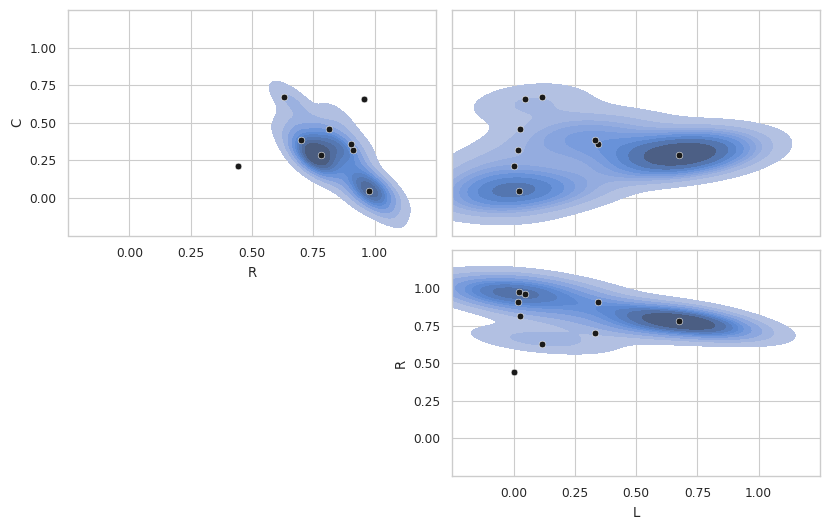

In [ ]:
# df = df2[(df2['N']==N)&(df2['biome']==biome)&(df2['ncom']==933)&(df2['init']==32)]
df = df2[(df2['N']==N)&(df2['biome']==biome)&(df2['ncom']==430)&(df2['init']==36)]
df_temp = pd.DataFrame(index=['I','C','R','L']).T

NP = df['N'].values[0]
i_com = df['ncom'].values[0]
init = df['init'].values[0]

df = pd.read_csv(os.path.join(fpath_dir,f'comp_{biome}{NP}/coms-n{NP}-{biome}-{i_com}-{init}.csv'))

# range transformation
df['I'] = (df['I'] - 1) / (NP-1)
df['C'] = (df['C'] - Cmin) / (Cmax - Cmin)
df['M'] = (df['M'] - Mmin) / (Mmax - Mmin)
df['L'] = (df['L'] - Lmin) / (Lmax - Lmin)

np_temp = df[list_dim].to_numpy()
hv_temp = hv.hypervolume(np_temp, verbose=True)
fd_rich = hv.kernel_alpha(hv_temp)
fd_div = hv.kernel_dispersion(hv_temp)
print(round(fd_rich,3), round(fd_div,3))
df_hv = pd.DataFrame(hv_temp, columns=list_dim)

df_sng = df.drop_duplicates()

fig, axs = plt.subplots(2, 2, figsize=(9, 6))
# fig.suptitle(f"Hypervolumes | Alternative states of N={NP} ncom={i_com}")

for i,y in enumerate(list_dim):
    for j,x in enumerate(list_dim[i+1:]):
        if x != y:
            sns.kdeplot(data=df_hv, x=x, y=y, warn_singular=False, ax=axs[i,j+i], fill=True)
            sns.scatterplot(data=df_sng, x=x, y=y, ax=axs[i,j+i], c='k')
        if j!=0:
            axs[i,j+i].label_outer()
        if i!=0:
            axs[j+i,i-1].remove()
        axs[i,j+i].set_xlim(-0.25, 1.25)
        axs[i,j+i].set_ylim(-0.25, 1.25)
        axs[i,j+i].set_yticks(np.arange(0.0, 1.25, 0.25))
        axs[i,j+i].set_xticks(np.arange(0.0, 1.25, 0.25))

# plt.tight_layout()
plt.tight_layout(w_pad=-1, h_pad=-0.7)
# plt.savefig("hv1.png", bbox_inches="tight", dpi=dpi, transparent=transparent)

In [1]:
# df = pd.read_csv(os.path.join(fpath_dir,f'comp_{biome}{NP}/coms-n{NP}-{biome}-{i_com}-{init}.csv'))
# hvtab = df.groupby(['I','C','M','R','L']).count()*0.001
# hvtab = hvtab.reset_index().to_latex(
#                         index=False
#                         escape=False,
#                         position='h!',
#                         multirow = True
#                     )
# hvtab = hvtab.replace("\\bottomrule\n", "").replace("\\toprule\n", "").replace("\\midrule\n", "").replace("\n", "").replace("\\\\", "\\")
# hvtab

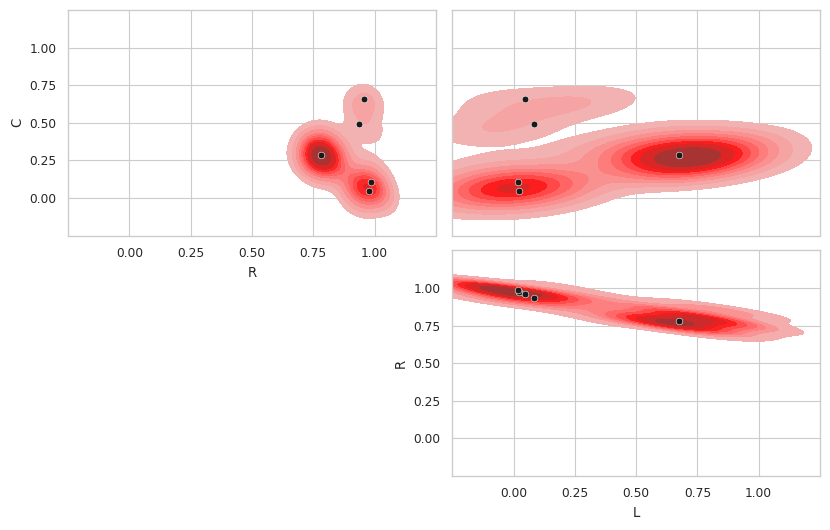

In [45]:
df = df2[(df2['N']==N)&(df2['biome']==biome)&(df2['ncom']==430)&(df2['init']==39)]
# df = df2[(df2['N']==N)&(df2['biome']==biome)&(df2['ncom']==840)&(df2['init']==23)]
df_temp = pd.DataFrame(index=['I','C','R','L']).T

NP = df['N'].values[0]
i_com = df['ncom'].values[0]
init = df['init'].values[0]

df = pd.read_csv(os.path.join(fpath_dir,f'comp_{biome}{NP}/coms-n{NP}-{biome}-{i_com}-{init}.csv'))

# range transformation
# df['I'] = (df['I'] - 1) / (NP-1)
df['C'] = (df['C'] - Cmin) / (Cmax - Cmin)
df['M'] = (df['M'] - Mmin) / (Mmax - Mmin)
df['L'] = (df['L'] - Lmin) / (Lmax - Lmin)

np_temp = df[list_dim].to_numpy()
hv_temp = hv.hypervolume(np_temp, verbose=True)
df_hv = pd.DataFrame(hv_temp, columns=list_dim)

df_sng = df.drop_duplicates()

fig, axs = plt.subplots(2, 2, figsize=(9, 6))
# fig.suptitle(f"Hypervolumes | Alternative states of N={NP} ncom={i_com}")

for i,y in enumerate(list_dim):
    for j,x in enumerate(list_dim[i+1:]):
        if x != y:
            sns.kdeplot(data=df_hv, x=x, y=y, warn_singular=False, ax=axs[i,j+i], fill=True, color='red')
            sns.scatterplot(data=df_sng, x=x, y=y, ax=axs[i,j+i], c='k')
        if j!=0:
            axs[i,j+i].label_outer()
        if i!=0:
            axs[j+i,i-1].remove()
        axs[i,j+i].set_xlim(-0.25, 1.25)
        axs[i,j+i].set_ylim(-0.25, 1.25)
        axs[i,j+i].set_yticks(np.arange(0.0, 1.25, 0.25))
        axs[i,j+i].set_xticks(np.arange(0.0, 1.25, 0.25))

# plt.tight_layout()
plt.tight_layout(w_pad=-1, h_pad=-0.7)
plt.savefig("hv2.png", bbox_inches="tight", dpi=dpi, transparent=transparent)

In [2]:
# df = pd.read_csv(os.path.join(fpath_dir,f'comp_{biome}{NP}/coms-n{NP}-{biome}-{i_com}-{init}.csv'))
# hvtab = df.groupby(['I','C','M','R','L']).count()*0.001
# hvtab = hvtab.reset_index().to_latex(
#                         index=False,
#                         escape=False,
#                         position='h!',
#                         multirow = True
#                     )
# hvtab = hvtab.replace("\\bottomrule\n", "").replace("\\toprule\n", "").replace("\\midrule\n", "").replace("\n", "").replace("\\\\", "\\")
# hvtab

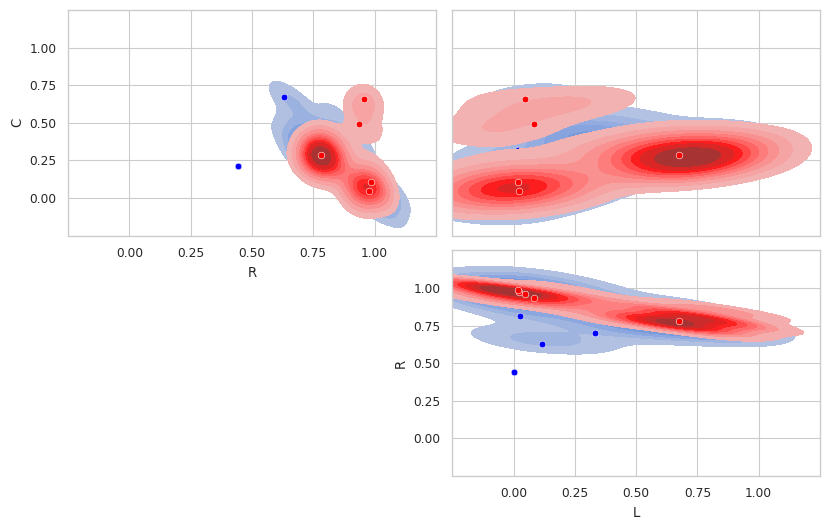

In [31]:
df = df2[(df2['N']==N)&(df2['biome']==biome)&(df2['ncom']==430)&(df2['init']==36)]
df_temp = pd.DataFrame(index=['I','C','R','L']).T

NP = df['N'].values[0]
i_com = df['ncom'].values[0]
init = df['init'].values[0]

df = pd.read_csv(os.path.join(fpath_dir,f'comp_{biome}{NP}/coms-n{NP}-{biome}-{i_com}-{init}.csv'))

# range transformation
df['I'] = (df['I'] - 1) / (NP-1)
df['C'] = (df['C'] - Cmin) / (Cmax - Cmin)
df['M'] = (df['M'] - Mmin) / (Mmax - Mmin)
df['L'] = (df['L'] - Lmin) / (Lmax - Lmin)

np_temp = df[list_dim].to_numpy()
hv_temp = hv.hypervolume(np_temp, verbose=True)
df_hv = pd.DataFrame(hv_temp, columns=list_dim)

df_sng = df.drop_duplicates()

fig, axs = plt.subplots(2, 2, figsize=(9, 6))
# fig.suptitle(f"Hypervolumes | Alternative states of N={NP} ncom={i_com}")

for i,y in enumerate(list_dim):
    for j,x in enumerate(list_dim[i+1:]):
        if x != y:
            sns.kdeplot(data=df_hv, x=x, y=y, warn_singular=False, ax=axs[i,j+i], fill=True)
            sns.scatterplot(data=df_sng, x=x, y=y, ax=axs[i,j+i], c='blue')
        if j!=0:
            axs[i,j+i].label_outer()
        if i!=0:
            axs[j+i,i-1].remove()
        axs[i,j+i].set_xlim(-0.25, 1.25)
        axs[i,j+i].set_ylim(-0.25, 1.25)
        axs[i,j+i].set_yticks(np.arange(0.0, 1.25, 0.25))
        axs[i,j+i].set_xticks(np.arange(0.0, 1.25, 0.25))

df = df2[(df2['N']==N)&(df2['biome']==biome)&(df2['ncom']==430)&(df2['init']==39)]
df_temp = pd.DataFrame(index=['I','C','R','L']).T

NP = df['N'].values[0]
i_com = df['ncom'].values[0]
init = df['init'].values[0]

df = pd.read_csv(os.path.join(fpath_dir,f'comp_{biome}{NP}/coms-n{NP}-{biome}-{i_com}-{init}.csv'))

# range transformation
df['I'] = (df['I'] - 1) / (NP-1)
df['C'] = (df['C'] - Cmin) / (Cmax - Cmin)
df['M'] = (df['M'] - Mmin) / (Mmax - Mmin)
df['L'] = (df['L'] - Lmin) / (Lmax - Lmin)

np_temp = df[list_dim].to_numpy()
hv_temp = hv.hypervolume(np_temp, verbose=True)
df_hv = pd.DataFrame(hv_temp, columns=list_dim)

df_sng = df.drop_duplicates()
# fig.suptitle(f"Hypervolumes | Alternative states of N={NP} ncom={i_com}")

for i,y in enumerate(list_dim):
    for j,x in enumerate(list_dim[i+1:]):
        if x != y:
            sns.kdeplot(data=df_hv, x=x, y=y, warn_singular=False, ax=axs[i,j+i], fill=True, color='red')
            sns.scatterplot(data=df_sng, x=x, y=y, ax=axs[i,j+i], c='red')

# plt.tight_layout()
plt.tight_layout(w_pad=-1, h_pad=-0.7)

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D  # enables 3D plotting
# import seaborn as sns
# import os

# # --- your selection / loading logic (unchanged) ---
# df = df2[(df2['N']==N)&(df2['biome']==biome)&(df2['ncom']==406)&(df2['init']==10)]
# df_temp = pd.DataFrame(index=['I','C','R','L']).T

# NP = df['N'].values[0]
# i_com = df['ncom'].values[0]
# init = df['init'].values[0]

# df = pd.read_csv(os.path.join(fpath_dir, f'comp_{biome}{NP}/coms-n{NP}-{biome}-{i_com}-{init}.csv'))

# # --- range transformation ---
# df['I'] = (df['I'] - 1) / (NP - 1)
# df['C'] = (df['C'] - Cmin) / (Cmax - Cmin)
# df['M'] = (df['M'] - Mmin) / (Mmax - Mmin)
# df['L'] = (df['L'] - Lmin) / (Lmax - Lmin)

# np_temp = df[list_dim].to_numpy()
# hv_temp = hv.hypervolume(np_temp, verbose=True)
# df_hv = pd.DataFrame(hv_temp, columns=list_dim)

# df_sng = df.drop_duplicates()

# # --- choose which 3 dimensions to plot ---
# dims3d = ['C','R','L']  # or any 3 from list_dim

# # --- create 3D figure ---
# fig = plt.figure(figsize=(7, 6))
# ax = fig.add_subplot(111, projection='3d')

# # --- plot hypervolume samples ---
# ax.scatter(df_hv[dims3d[0]], df_hv[dims3d[1]], df_hv[dims3d[2]],
#            c='skyblue', alpha=0.4, s=20, label='Hypervolume points')

# # --- plot unique community states ---
# ax.scatter(df_sng[dims3d[0]], df_sng[dims3d[1]], df_sng[dims3d[2]],
#            c='k', s=40, label='Unique points')

# # --- axes limits and labels ---
# ax.set_xlim(-0.25, 1.25)
# ax.set_ylim(-0.25, 1.25)
# ax.set_zlim(-0.25, 1.25)
# ax.set_xticks(np.arange(0.0, 1.25, 0.25))
# ax.set_yticks(np.arange(0.0, 1.25, 0.25))
# ax.set_zticks(np.arange(0.0, 1.25, 0.25))

# ax.set_xlabel(dims3d[0])
# ax.set_ylabel(dims3d[1])
# ax.set_zlabel(dims3d[2])

# ax.legend()
# plt.tight_layout()
# plt.show()


### Biodiversity in Fire model vs Tilman (Fig. 1)

In [6]:
df_diff = pd.read_csv(os.path.join(fpath_dir, 'biodindex-difference.csv'))
df_diff.loc[df_diff['eco-type']=='med10','eco-type'] = 'Med-10'
df_diff.loc[df_diff['eco-type']=='med50','eco-type'] = 'Med-50'
df_diff.loc[df_diff['eco-type']=='bor10','eco-type'] = 'Bor-10'

##### Wilcoxon signed-rank test
The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution. In particular, it tests whether the distribution of the differences x - y is symmetric about zero. It is a non-parametric version of the paired T-test.

In [7]:
for bioind in ['isimpson', 'frichness', 'fdivergence']:

    print(bioind)
    for biome in ['Med-10', 'Med-50', 'Bor-10']:

        arrdat = df_diff[df_diff['eco-type']==biome][bioind].to_numpy()

        stat, pvalue = scs.wilcoxon(x=arrdat, alternative='greater', zero_method='wilcox')
        
        print(biome)
        print('statistic:', '{:.0f}'.format(stat), '\npvalue:', '{:.4f}'.format(pvalue), '\n', pvalue<0.05, '\n')
    print('\n')

isimpson
Med-10
statistic: 65998867 
pvalue: 0.0000 
 True 

Med-50
statistic: 361719713 
pvalue: 0.0000 
 True 

Bor-10
statistic: 78120705 
pvalue: 0.0000 
 True 



frichness
Med-10
statistic: 60355548 
pvalue: 0.0000 
 True 

Med-50
statistic: 280410330 
pvalue: 0.0000 
 True 

Bor-10
statistic: 70301374 
pvalue: 0.0000 
 True 



fdivergence
Med-10
statistic: 64957723 
pvalue: 0.0000 
 True 

Med-50
statistic: 330491312 
pvalue: 0.0000 
 True 

Bor-10
statistic: 76840023 
pvalue: 0.0000 
 True 





In [8]:
# np.random.seed(0)
# print('MWU test -- H_A: observed data is greater than zero distribution')
# for bioind in ['srichness', 'isimpson', 'frichness', 'fdivergence']:

#     print(bioind)
#     for biome in ['Med-10', 'Med-50', 'Bor-10']:

#         arrdat = df_diff[df_diff['eco-type']==biome][bioind].to_numpy()
#         if bioind=='srichness':
#             zerodist = np.random.normal(loc=0, scale=np.std(arrdat), size=arrdat.shape).astype(int)
#         else:
#             zerodist = np.random.normal(loc=0, scale=np.std(arrdat), size=arrdat.shape)

#         stat, pvalue = scs.mannwhitneyu(arrdat, zerodist, alternative='greater')
        
#         print(biome)
#         print('statistic:', '{:.0f}'.format(stat), '\npvalue:', '{:.4f}'.format(pvalue), '\n', pvalue<0.05, '\n')
#     print('\n')

##### Sign Test
Applied to the discrete distribution of $\Delta S$

In [9]:
for bioind in ['srichness']:

    print(bioind)
    for biome in ['Med-10', 'Med-50', 'Bor-10']:

        arrdat = df_diff[df_diff['eco-type']==biome][bioind].to_numpy()

        M, pvalue = sign_test(samp=arrdat, mu0=0)
        
        print(biome)
        print('M:', '{:.0f}'.format(M), '\npvalue:', '{:.4f}'.format(pvalue), '\n', pvalue<0.05, M<0, '\n')
    print('\n')

srichness
Med-10
M: 1352 
pvalue: 0.0000 
 True False 

Med-50
M: 4976 
pvalue: 0.0000 
 True False 

Bor-10
M: 3918 
pvalue: 0.0000 
 True False 





#### Plot the distributions

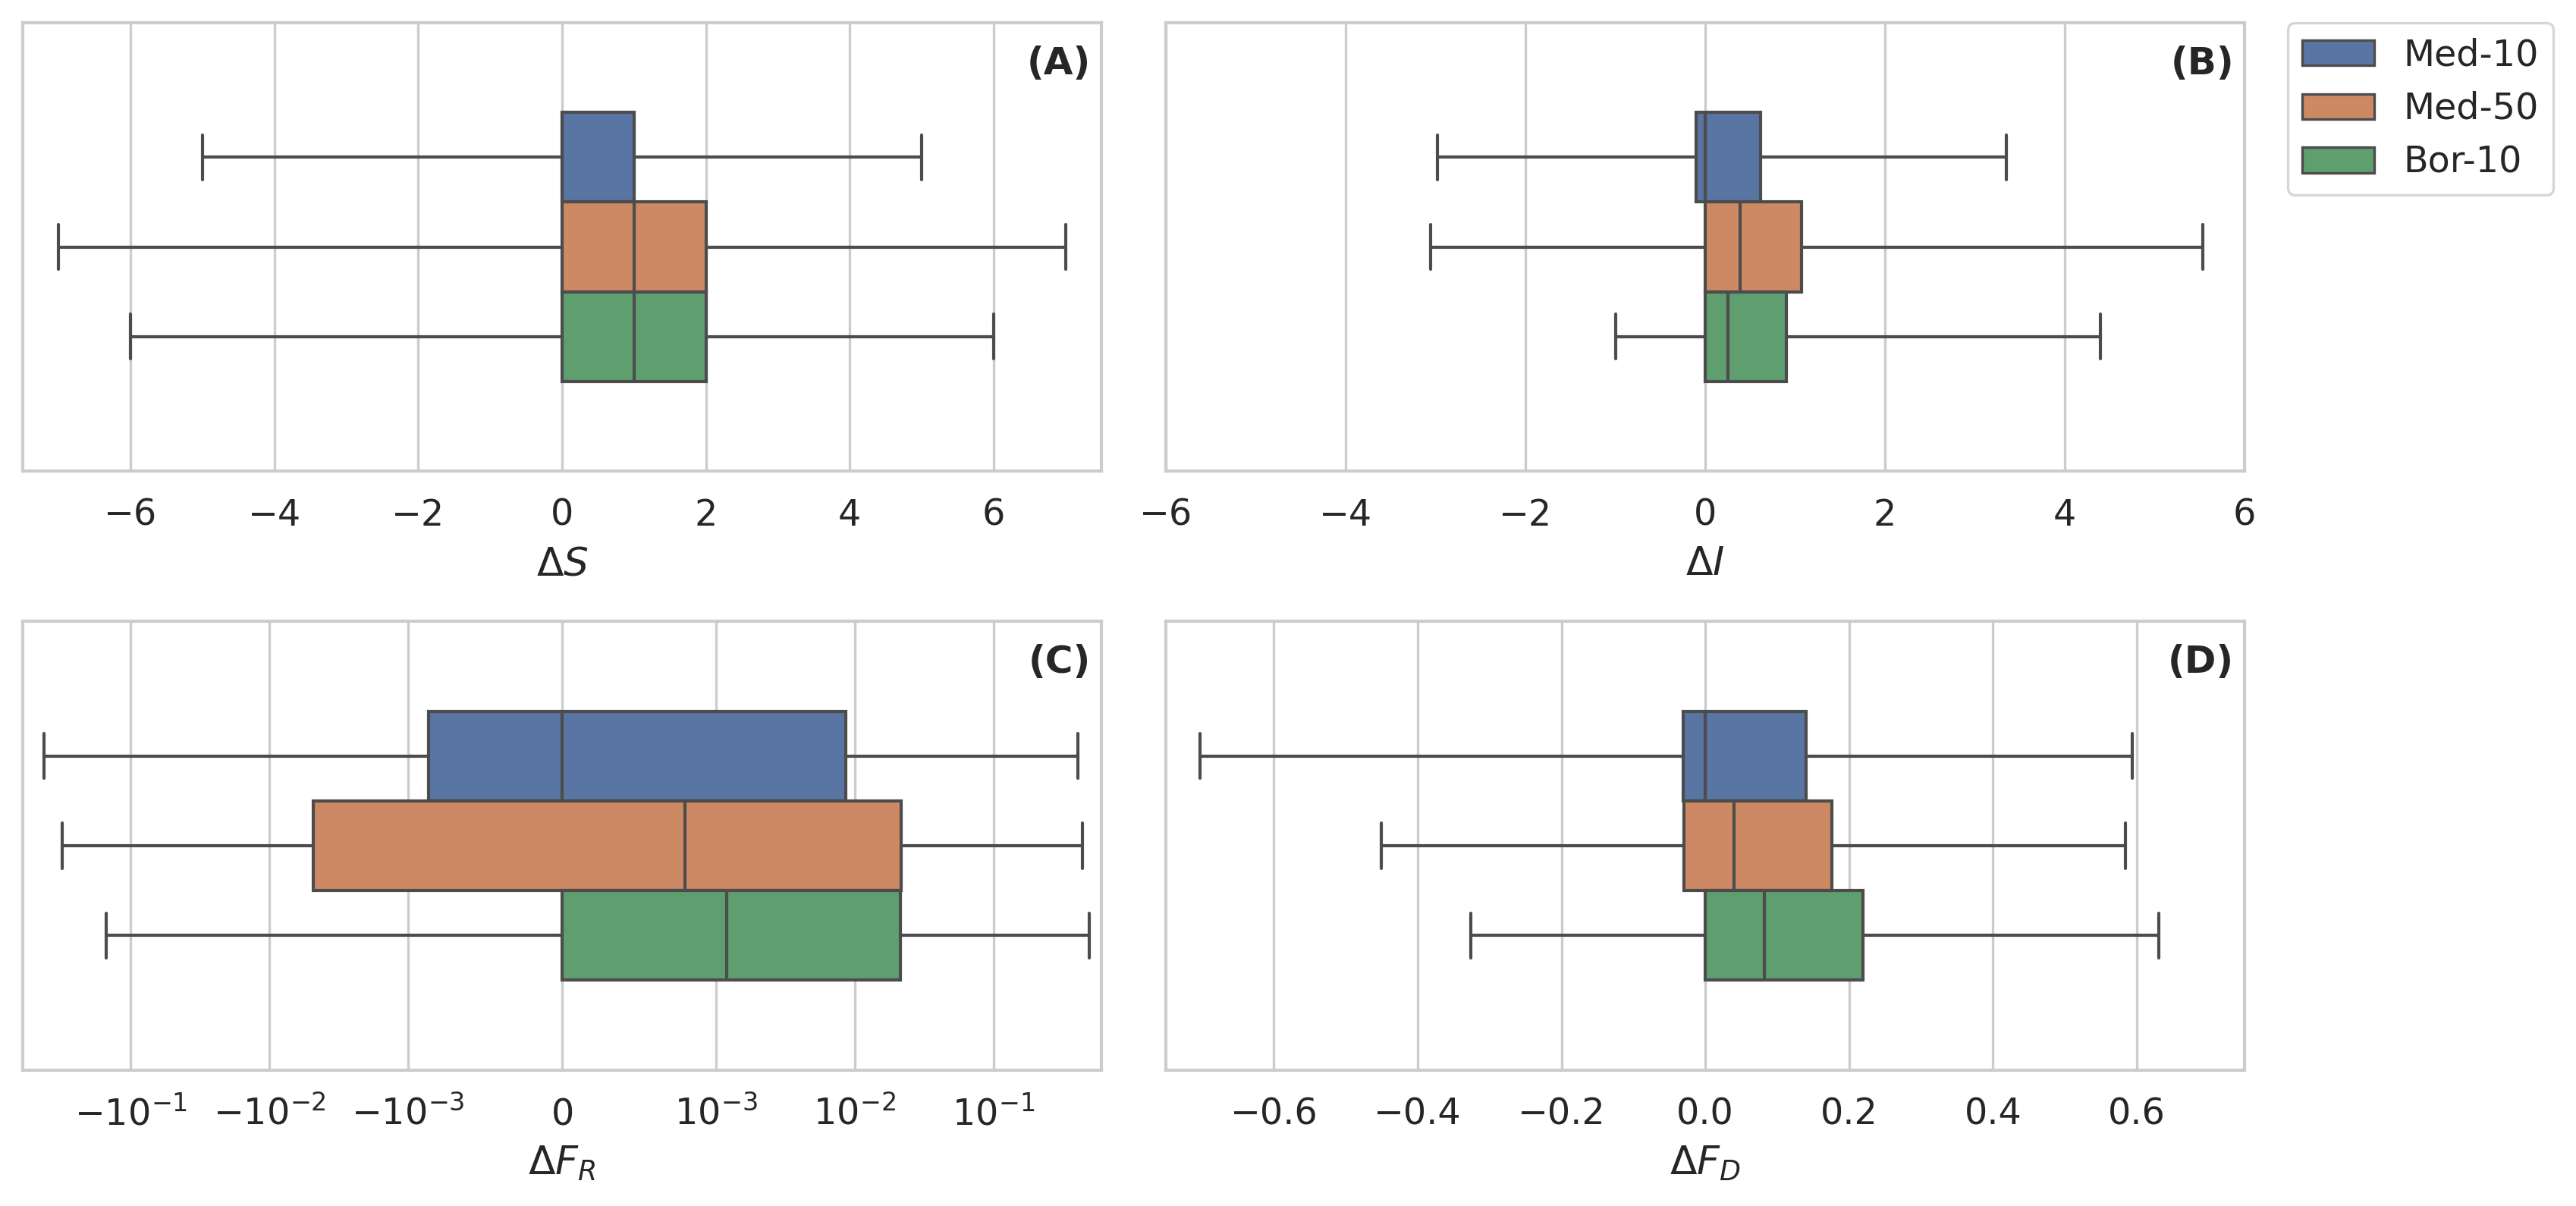

In [12]:
fig, ax2 = plt.subplots(2,2, figsize=(12,6), sharey=True, dpi=dpi)

data = df_diff

hue_order = ['Med-10', 'Med-50', 'Bor-10']

sns.boxplot(data=data, x="srichness", hue='eco-type', hue_order=hue_order, width=.6, whis=1000, ax=ax2[0,0], legend=False)
# sns.boxplot(data=data, x="srichness", hue='eco-type', hue_order=hue_order, width=.6, ax=ax2[0,0], legend=False)
ax2[0,0].set_xlabel(r'$\Delta S$')
ax2[0,0].set_xlim(-7.5, 7.5)
# ax2[0,0].set_xticks(np.arange(-4, 9, 2))

sns.boxplot(data=data, x="isimpson", hue='eco-type', hue_order=hue_order, width=.6, whis=1000, ax=ax2[0,1])
ax2[0,1].set_xlabel(r'$\Delta I$')
ax2[0,1].set_xlim(-6.0, 6.0)

box = sns.boxplot(data=data, x="frichness", hue='eco-type', hue_order=hue_order, width=.6, whis=3000, ax=ax2[1,0], legend=False)
# Define some hatches
# hatches = ['\\\\\\', '\\\\\\', '']
# # Loop over the bars
# for i,thisbar in enumerate(box.patches):
#     # Set a different hatch for each bar
#     thisbar.set_hatch(hatches[i])
# sns.boxplot(data=data, x="frichness", hue='eco-type', width=.6, ax=ax2[1,0], legend=False)
ax2[1,0].set_xlabel(r'$\Delta F_R$')
ax2[1,0].set_xscale('symlog', linthresh=0.001)
ax2[1,0].set_xlim(-0.6, 0.6)

sns.boxplot(data=data, x="fdivergence", hue='eco-type', hue_order=hue_order, width=.6, whis=1000, ax=ax2[1,1], legend=False)
ax2[1,1].set_xlabel(r'$\Delta F_D$')
ax2[1,1].set_xlim(-0.75, 0.75)

# Add identifying letters to each subplot, positioned at the top-right corner
letters = ['(A)', '(B)', '(C)', '(D)']
for i, ax in enumerate(ax2.flat):
    ax.text(0.99, 0.95, letters[i], transform=ax.transAxes, fontsize=12, fontweight='bold', 
            va='top', ha='right')

ax2[0,1].legend(bbox_to_anchor=(1.04, 1), loc="upper left", borderaxespad=0)

# plt.tight_layout()
plt.tight_layout(w_pad=0.4, h_pad=0.4)
plt.savefig("figure1.png", bbox_inches="tight", dpi=dpi, transparent=transparent)

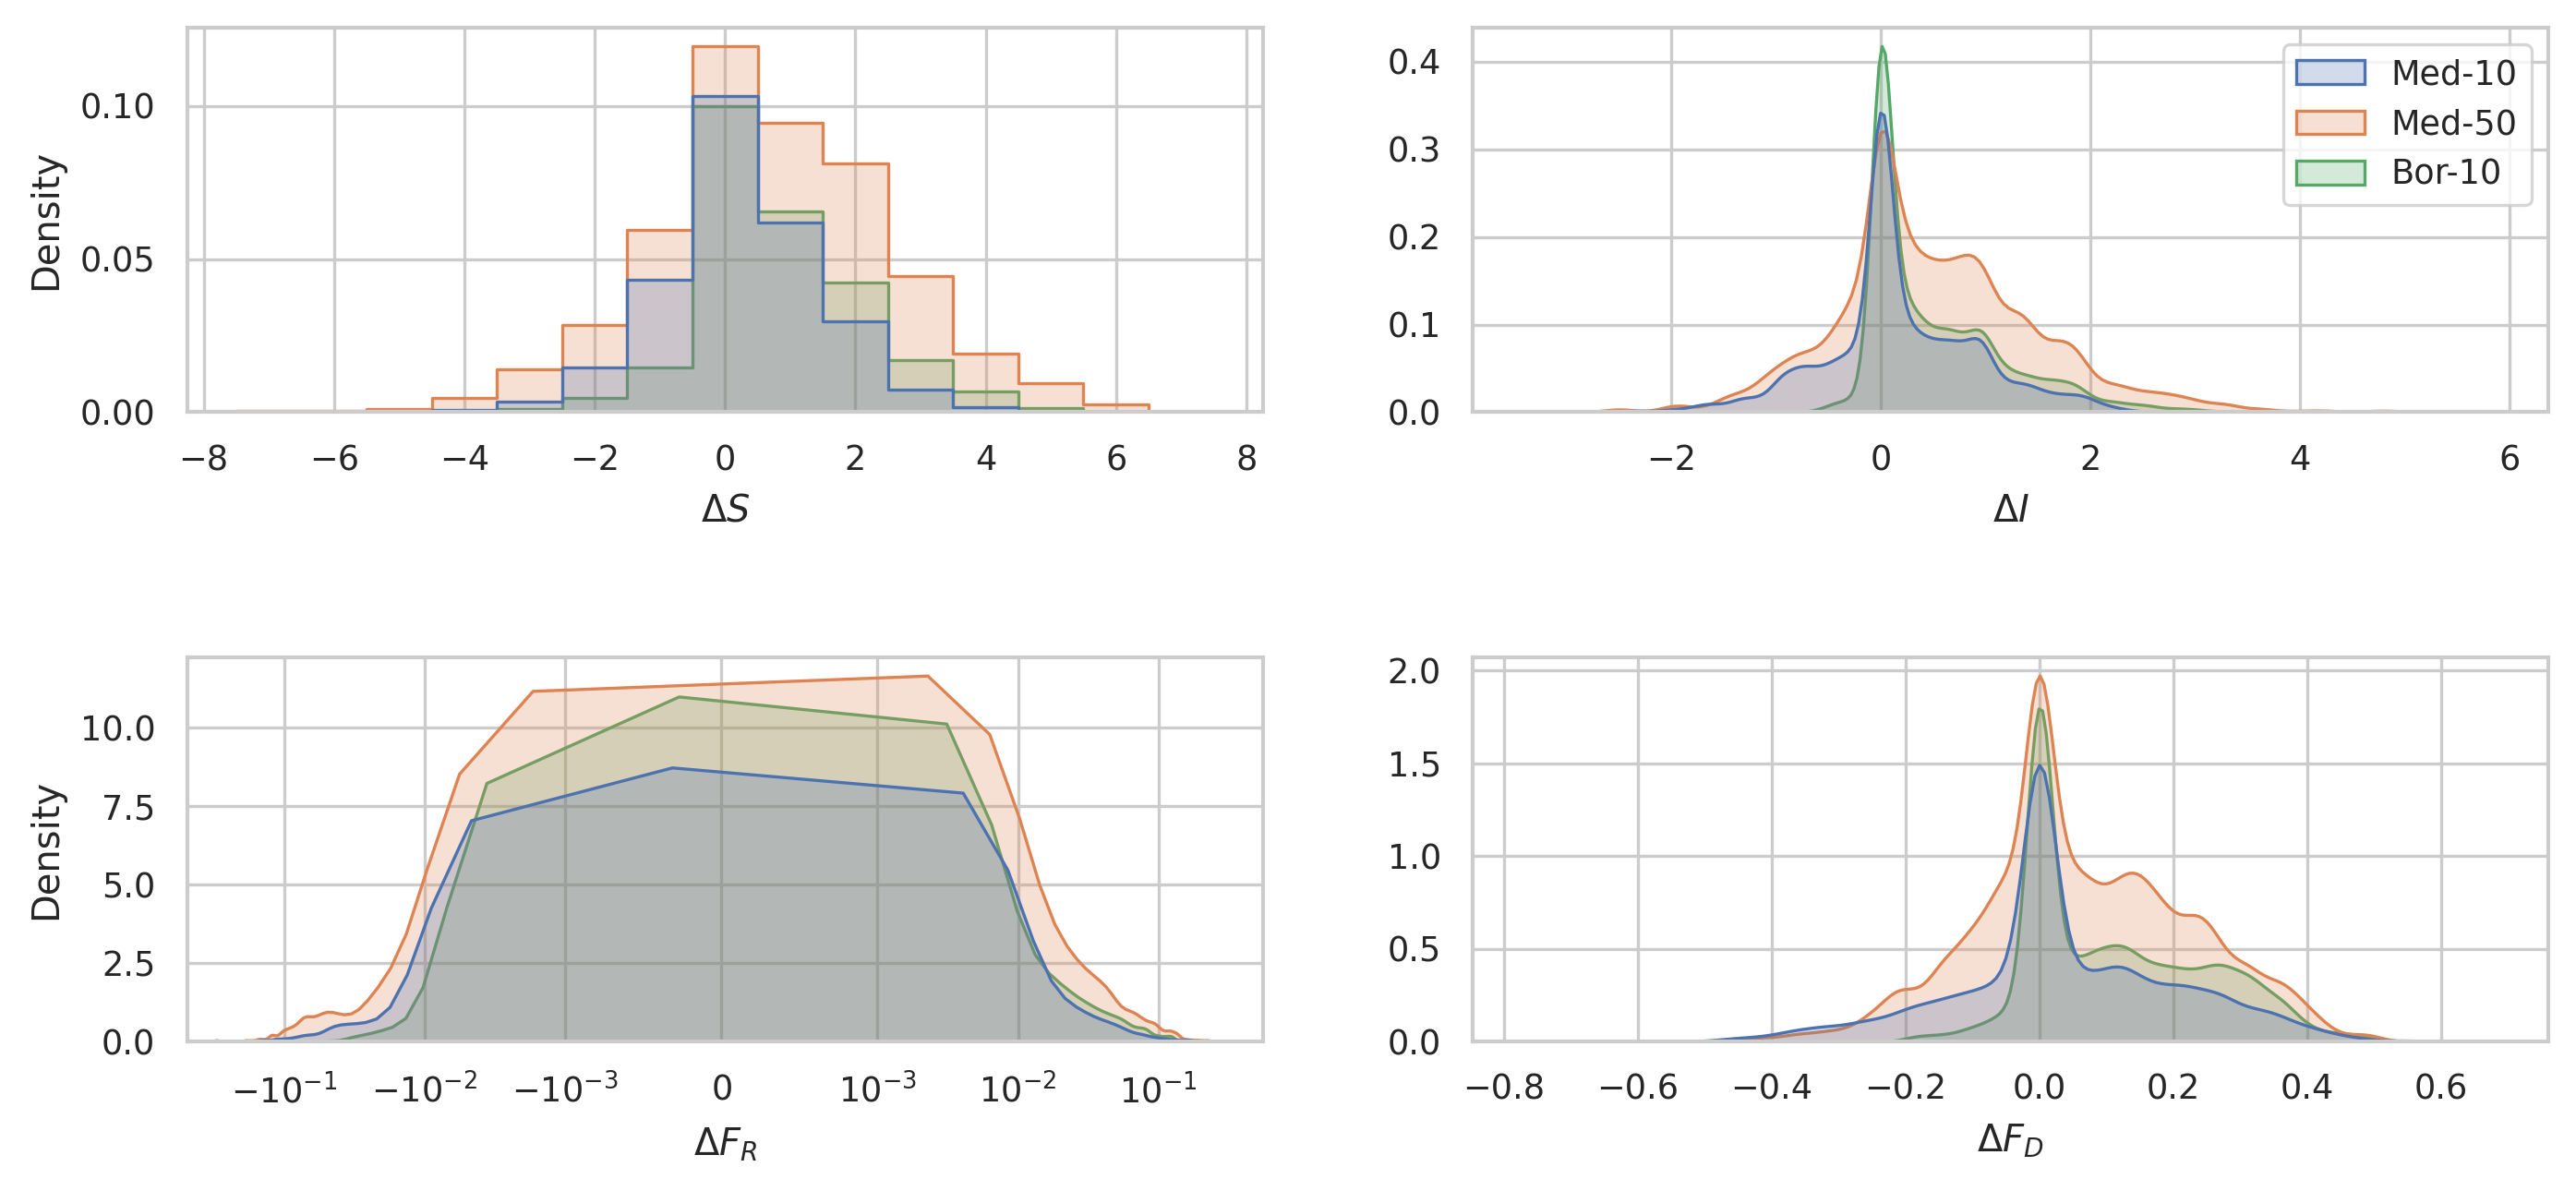

In [156]:
fig, ax2 = plt.subplots(2,2, figsize=(10,5), dpi=300)

data = df_diff

sns.histplot(data=data, x="srichness", hue='eco-type', hue_order=hue_order, stat='density', element="step", binwidth=1, binrange=(min(data['srichness'])-0.5, max(data['srichness']) + 0.5), ax=ax2[0,0], legend=False)
ax2[0,0].set_xlabel(r'$\Delta S$')

sns.kdeplot(data=data, x="isimpson", hue='eco-type', hue_order=hue_order, fill=True, ax=ax2[0,1])
ax2[0,1].set_xlabel(r'$\Delta I$')

sns.kdeplot(data=data, x="frichness", hue='eco-type', hue_order=hue_order, fill=True, ax=ax2[1,0], legend=False)
ax2[1,0].set_xlabel(r'$\Delta F_R$')
ax2[1,0].set_xscale('symlog', linthresh=0.001)
ax2[1,0].set_xticks([-0.1, -0.01, -0.001, 0.0, 0.001, 0.01, 0.1])

sns.kdeplot(data=data, x="fdivergence", hue='eco-type', hue_order=hue_order, fill=True, ax=ax2[1,1], legend=False)
ax2[1,1].set_xlabel(r'$\Delta F_D$')

for ax in ax2[:,1]:
    ax.set_ylabel("")
    # ax.label_outer()
    # ax.set_xlabel('')
    # ax.set_xticks([0, 1, 2])
    # ax.set_xticklabels(['Med-10', 'Med-50', 'Bor-10'])

ax2[0,1].get_legend().set_title("")
# sns.move_legend(ax2[0,1], "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()

###  Quantile Regressions
Quantile Regression libraries and functions

In [13]:
def wald_test(model):

# Get the coefficients (excluding intercept)
    beta = model.params[1:]  # Coefficients for X and X_squared

    # Get the covariance matrix of the estimated coefficients
    cov_matrix = model.cov_params().iloc[1:, 1:]  # Covariance for X and X_squared

    # Wald statistic calculation: W = beta' * (cov^-1) * beta
    wald_stat = np.dot(np.dot(beta.T, np.linalg.inv(cov_matrix)), beta)

    # Degrees of freedom is the number of coefficients (excluding the intercept)
    df = len(beta)

    # Compute p-value based on chi-squared distribution
    p_value = scs.chi2.sf(wald_stat, df)

    # print(f"Wald Test Statistic: {wald_stat:.4f}")
    # print(f"p-value: {p_value:.4f}")

    return wald_stat, p_value

In [14]:
def aic_test(Y, X, Y_pr, model):
    # return aic metric
    k_params = model.df_model + model.k_constant
    
    # Estimate maximized log likelihood
    nobs = float(X.shape[0])
    nobs2 = nobs / 2.0
    nobs = float(nobs)
    resid = Y - Y_pr
    ssr = np.sum((resid)**2)
    llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2

    return -2 * llf + 2 * k_params

In [15]:
def best_poly_quantile_regression(Y, X, quantile=0.5, max_degree=5, verbose=True):
    best_degree = None
    best_aic = np.inf  # Initialize to a large value
    best_model = None

    # Data preparation
    data = pd.DataFrame({'X': X, 'Y': Y})

    # Iterate over polynomial degrees from 1 to max_degree
    for degree in range(1, max_degree + 1):
        # Construct formula for polynomial regression up to the current degree
        formula = 'Y ~ ' + ' + '.join([f'np.power(X, {i})' for i in range(1, degree + 1)])

        # Fit quantile regression for the current degree
        model = smf.quantreg(formula, data).fit(q=quantile, max_iter=max_iter)
        
        # Predict the values for Y
        Y_pr = model.predict(data)
        
        # Calculate AIC for the current model
        aic_value = aic_test(data['Y'], data['X'], Y_pr, model)
        
        # print(f'Degree {degree}: AIC = {aic_value:.4f}')

        w_stat, w_pval = wald_test(model)
        # keep only the statistically significant regression
        if w_pval < 0.05:
            # Update the best model if current AIC is smaller
            if aic_value < best_aic:
                best_aic = aic_value
                best_degree = degree
                best_model = model

    if verbose:
        print(f'Best Polynomial Degree: {best_degree} with AIC = {best_aic:.4f}\n')
    return best_degree, best_model, best_aic

#### Biodiversity over fire return time gradient

In [16]:
# Common parameters for the plots
sz = 5
al = 0.6

frt_max = 1900
frt_min = 4

colorq = ['gold','cornflowerblue','crimson']
# quantiles = [.75, .85, .95]

# ['purple', 'darkorange', 'forestgreen']
quantiles = [.85, .90 ,.95]

In [17]:
df2 = pd.read_csv(os.path.join(fpath_dir, 'coms-fire-bioindex-fd.csv'))
df2['frt']=np.log10(df2['frt'])

##### Compositional Diversity ($S$, $I$)

In [18]:
def plot_qreg_cdiv(df, ax2, i, n, biome, quantiles=[.75, .85, .95], colorq=['crimson','gold','cornflowerblue'], orientation='v', verbose=True):

    if orientation=='v':
        ax2[1,0].set_ylabel("$S$")
        ax2[1,1].set_ylabel("$I$")
    elif orientation=='o':
        ax2[0,0].set_ylabel("$S$")
        ax2[1,0].set_ylabel("$I$")

    if verbose:
        print(f'n={n}, {biome}')

    if np.any(df):

        data = df[(df['N'] == n) & (df['biome'] == biome)]

        if orientation=='v':
            ax2[i,0].scatter('frt', 'srichness', data=data, s=sz, alpha=al, c='grey', label='')
            ax2[i,1].scatter('frt', 'isimpson', data=data, s=sz, alpha=al, c='grey', label='')
            
        elif orientation=='o':
            ax2[0,i].scatter('frt', 'srichness', data=data, s=sz, alpha=al, c='grey', label='')
            ax2[1,i].scatter('frt', 'isimpson', data=data, s=sz, alpha=al, c='grey', label='')



        # QUANTILE REGRESSION

        x_p = np.linspace(data.frt.min(), data.frt.max(), 100)

        for q,cq in zip(quantiles,colorq):
            if verbose:
                print(f'Quantile={q}')
                print('Species Richness')
            X = data['frt']
            Y = data['srichness']
            best_degree, best_model, best_aic = best_poly_quantile_regression(Y, X, quantile=q, max_degree=5, verbose=verbose)
            df_pred = pd.DataFrame({'X': x_p})
            # Add the necessary polynomial terms up to the best degree found
            for degree in range(2, best_degree + 1):
                df_pred[f'np.power(X, {degree})'] = np.power(df_pred['X'], degree)

            if orientation=='v':
                ax2[i,0].plot(x_p, best_model.predict(df_pred), linestyle='-', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))
            elif orientation=='o':
                ax2[0,i].plot(x_p, best_model.predict(df_pred), linestyle='-', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))

            if verbose:
                print('Inverse Simpson Index')
            Y = data['isimpson']
            best_degree, best_model, best_aic = best_poly_quantile_regression(Y, X, quantile=q, max_degree=5, verbose=verbose)
            df_pred = pd.DataFrame({'X': x_p})
            # Add the necessary polynomial terms up to the best degree found
            for degree in range(2, best_degree + 1):
                df_pred[f'np.power(X, {degree})'] = np.power(df_pred['X'], degree)
            
            if orientation=='v':
                ax2[i,1].plot(x_p, best_model.predict(df_pred), linestyle='-', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))
            elif orientation=='o':
                ax2[1,i].plot(x_p, best_model.predict(df_pred), linestyle='-', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))


n=10, med
Quantile=0.85
Species Richness
Best Polynomial Degree: 5 with AIC = 60769.4562

Inverse Simpson Index
Best Polynomial Degree: 2 with AIC = 46895.3713

Quantile=0.9
Species Richness


/work/users/mtorrassa/miniforge3/envs/env_biofire/lib/python3.12/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (350000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


Best Polynomial Degree: 5 with AIC = 71146.8521

Inverse Simpson Index
Best Polynomial Degree: 4 with AIC = 53450.2090

Quantile=0.95
Species Richness
Best Polynomial Degree: 3 with AIC = 75857.1596

Inverse Simpson Index
Best Polynomial Degree: 5 with AIC = 60675.4103

n=50, med
Quantile=0.85
Species Richness
Best Polynomial Degree: 3 with AIC = 140133.7847

Inverse Simpson Index
Best Polynomial Degree: 2 with AIC = 103912.0585

Quantile=0.9
Species Richness
Best Polynomial Degree: 2 with AIC = 147841.8735

Inverse Simpson Index
Best Polynomial Degree: 5 with AIC = 115033.3085

Quantile=0.95
Species Richness
Best Polynomial Degree: 4 with AIC = 162559.4178

Inverse Simpson Index
Best Polynomial Degree: 4 with AIC = 129694.3141

n=10, bor
Quantile=0.85
Species Richness
Best Polynomial Degree: 4 with AIC = 66635.2305

Inverse Simpson Index
Best Polynomial Degree: 4 with AIC = 46105.5702

Quantile=0.9
Species Richness
Best Polynomial Degree: 5 with AIC = 70570.1100

Inverse Simpson Index

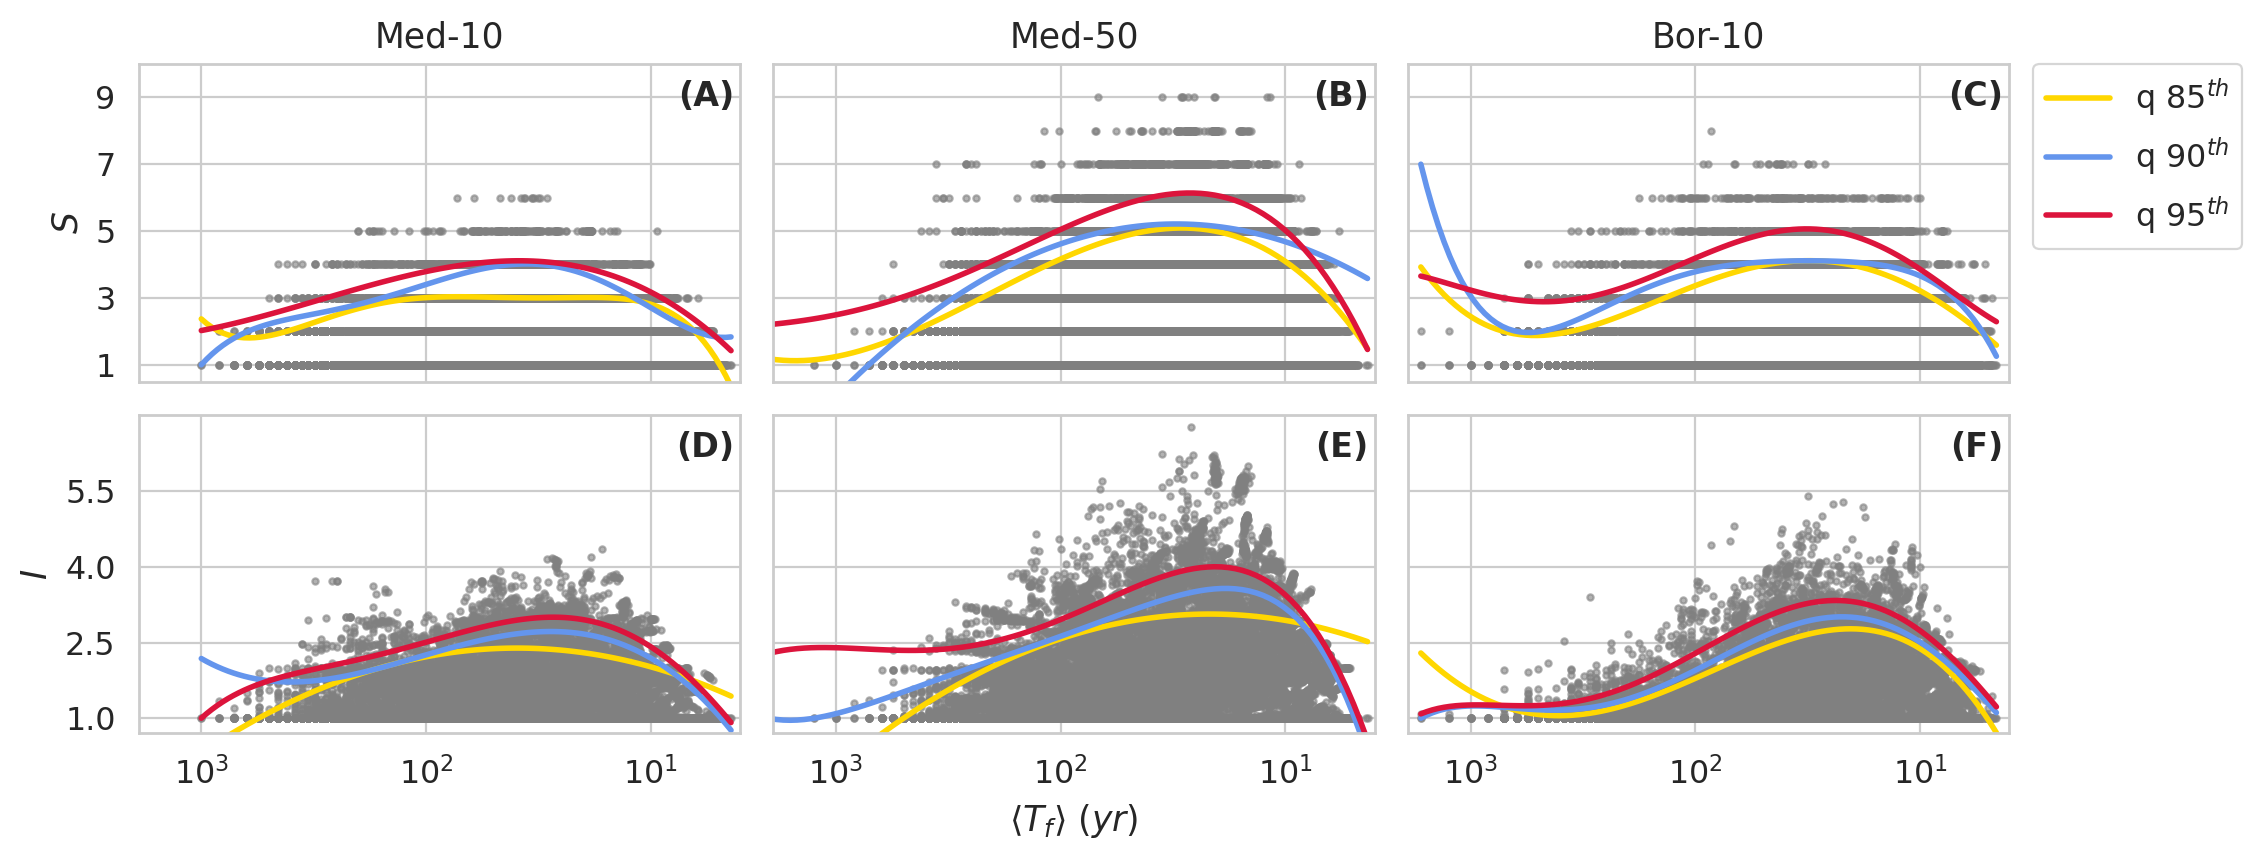

In [19]:
fig, ax2 = plt.subplots(2,3, figsize=(12,5), sharex=True, sharey='row', dpi=200)

n=10
i = 0
biome='med'
plot_qreg_cdiv(df2, ax2, i, n, biome, quantiles, colorq, orientation='o', verbose=True)

n=50
i = 1
biome='med'
plot_qreg_cdiv(df2, ax2, i, n, biome, quantiles, colorq, orientation='o', verbose=True)

n=10
i = 2
biome='bor'
plot_qreg_cdiv(df2, ax2, i, n, biome, quantiles, colorq, orientation='o', verbose=True)

# fix the aesthetic of the plot
# Add a single x-label at the bottom

ax2[1,1].set_xlabel(r"$\langle T_f \rangle$ ($yr$)")

axs = ax2.flatten()
for ax in axs:
    ax.invert_xaxis()
    ax.set(xlim=(np.log10(frt_max),np.log10(frt_min)))
    ticks = [1, 2, 3]
    ax.set_xticks(ticks)
    ax.set_xticklabels([fr'$10^{i}$' for i in ticks])

for ax in ax2[0]:
    ax.set_yticks(np.arange(1.0, 10, 2))
    ax.set_ylim([0.5,10.0])

for ax in ax2[1]:
    ax.set_yticks(np.arange(1.0, 7.0, 1.5))
    ax.set_ylim([0.7,7.0])

ax2[0,0].set_title('Med-10')
ax2[0,1].set_title('Med-50')
ax2[0,2].set_title('Bor-10')

# Add identifying letters to each subplot, positioned at the top-right corner
letters = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)']
for i, ax in enumerate(ax2.flat):
    ax.text(0.99, 0.95, letters[i], transform=ax.transAxes, fontsize=12, fontweight='bold', 
            va='top', ha='right')

ax2[0,-1].legend(bbox_to_anchor=(1.04, 1), loc="upper left", borderaxespad=0)
# ax2[0,0].legend()

plt.tight_layout(w_pad=0.4, h_pad=0.4)
plt.savefig("figure2.png", bbox_inches="tight", dpi=dpi, transparent=transparent)

##### Functional Diversity ($F_R$, $F_D$)

In [20]:
def plot_qreg_fdiv(df, ax2, i, n, biome, quantiles=[.95, .85, .75], colorq=['crimson','gold','cornflowerblue'], orientation='o', verbose=True):

    if orientation=='v':
        ax2[1,0].set_ylabel("$F_R$")
        ax2[1,1].set_ylabel("$F_D$")
    elif orientation=='o':
        ax2[0,0].set_ylabel("$F_R$")
        ax2[1,0].set_ylabel("$F_D$")
    

    if verbose:
        print(f'n={n}, {biome}')

    if np.any(df):

        data = df[(df['N'] == n) & (df['biome'] == biome)]
        
        if orientation=='v':
            ax2[i,0].scatter('frt', 'frichness', data=data, s=sz, alpha=al, c='grey', label='')
            ax2[i,1].scatter('frt', 'fdivergence', data=data, s=sz, alpha=al, c='grey', label='')
        elif orientation=='o':
            ax2[0,i].scatter('frt', 'frichness', data=data, s=sz, alpha=al, c='grey', label='')
            ax2[1,i].scatter('frt', 'fdivergence', data=data, s=sz, alpha=al, c='grey', label='')

        # QUANTILE REGRESSION

        x_p = np.linspace(data.frt.min(), data.frt.max(), 100)

        for q,cq in zip(quantiles,colorq):
            if verbose:
                print(f'Quantile={q}')

            X = data['frt']

            if verbose:
                print('Functional Richness')

            Y = data['frichness']
            best_degree, best_model, best_aic = best_poly_quantile_regression(Y, X, quantile=q, max_degree=5, verbose=verbose)
            df_pred = pd.DataFrame({'X': x_p})
            # Add the necessary polynomial terms up to the best degree found
            for degree in range(2, best_degree + 1):
                df_pred[f'np.power(X, {degree})'] = np.power(df_pred['X'], degree)
            if orientation=='v':
                ax2[i,0].plot(x_p, best_model.predict(df_pred), linestyle='-', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))
            elif orientation=='o':
                ax2[0,i].plot(x_p, best_model.predict(df_pred), linestyle='-', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))

            if verbose:
                print('Functional Divergence')

            Y = data['fdivergence']
            best_degree, best_model, best_aic = best_poly_quantile_regression(Y, X, quantile=q, max_degree=5, verbose=verbose)
            df_pred = pd.DataFrame({'X': x_p})
            # Add the necessary polynomial terms up to the best degree found
            for degree in range(2, best_degree + 1):
                df_pred[f'np.power(X, {degree})'] = np.power(df_pred['X'], degree)
            if orientation=='v':
                ax2[i,1].plot(x_p, best_model.predict(df_pred), linestyle='-', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))
            elif orientation=='o':
                ax2[1,i].plot(x_p, best_model.predict(df_pred), linestyle='-', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))


In [21]:
data = df2[(df2['N'] == 10) & (df2['biome'] == 'med')]
print('med10', data.max())

data = df2[(df2['N'] == 50) & (df2['biome'] == 'med')]
print('med50', data.max())

data = df2[(df2['N'] == 10) & (df2['biome'] == 'bor')]
print('bor10', data.max())

med10 Unnamed: 0.1       18539
Unnamed: 0         11999
biome                med
N                     10
ncom                2000
init                  12
frt                  3.0
srichness              6
isimpson        4.349156
frichness       0.406609
fdivergence     0.607998
dtype: object
med50 Unnamed: 0.1       69688
Unnamed: 0          2599
biome                med
N                     50
ncom                1000
init                  52
frt              3.69897
srichness              9
isimpson        6.777572
frichness       0.439734
fdivergence     0.584329
dtype: object
bor10 Unnamed: 0.1       36252
Unnamed: 0         11999
biome                bor
N                     10
ncom                2000
init                  12
frt             3.221849
srichness              8
isimpson        5.398138
frichness       0.489361
fdivergence     0.630449
dtype: object


n=10, med
Quantile=0.85
Functional Richness
Best Polynomial Degree: 2 with AIC = -65951.7307

Functional Divergence
Best Polynomial Degree: 4 with AIC = -8848.1866

Quantile=0.9
Functional Richness
Best Polynomial Degree: 2 with AIC = -57967.0743

Functional Divergence
Best Polynomial Degree: 4 with AIC = -4708.3203

Quantile=0.95
Functional Richness
Best Polynomial Degree: 3 with AIC = -41580.6341

Functional Divergence
Best Polynomial Degree: 5 with AIC = 1305.5746

n=50, med
Quantile=0.85
Functional Richness
Best Polynomial Degree: 1 with AIC = -106665.4042

Functional Divergence
Best Polynomial Degree: 2 with AIC = -29720.6744

Quantile=0.9
Functional Richness
Best Polynomial Degree: 4 with AIC = -93478.4228

Functional Divergence
Best Polynomial Degree: 1 with AIC = -22311.0706

Quantile=0.95
Functional Richness
Best Polynomial Degree: 5 with AIC = -69948.0800

Functional Divergence
Best Polynomial Degree: 2 with AIC = -12166.8406

n=10, bor
Quantile=0.85
Functional Richness
Best 

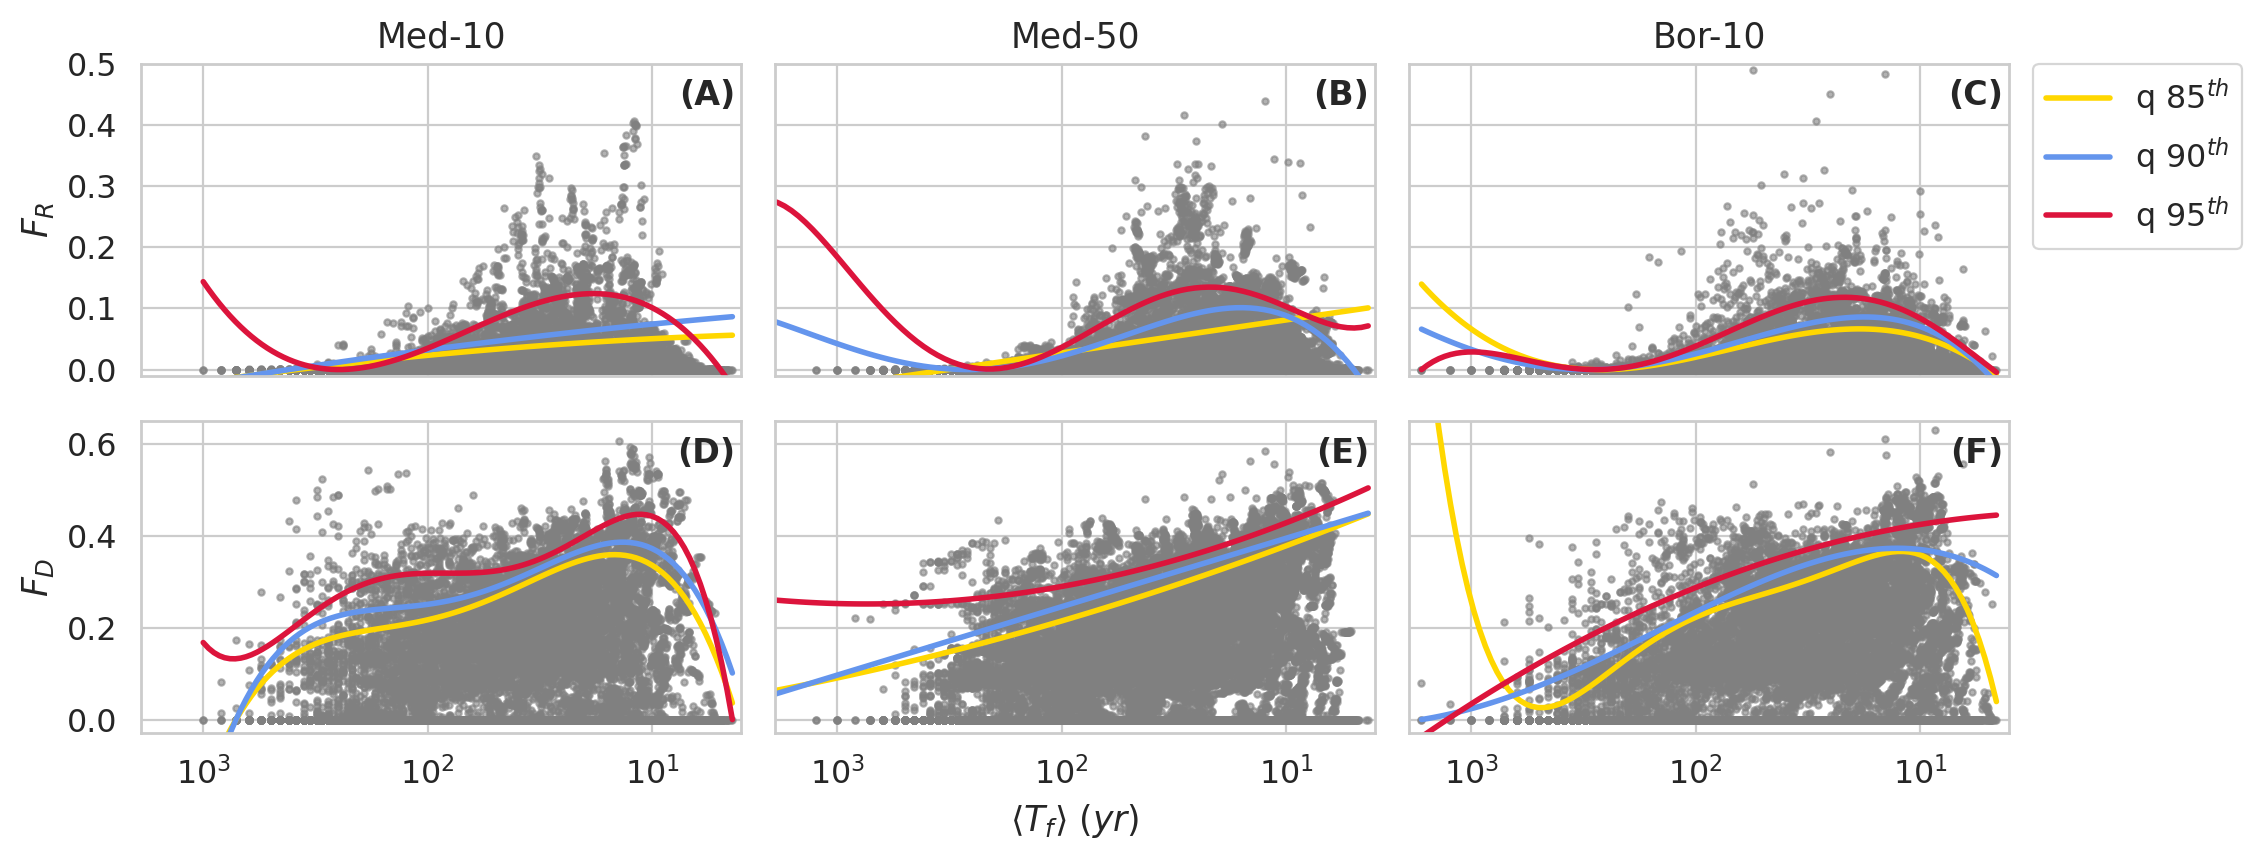

In [22]:
fig, ax2 = plt.subplots(2,3, figsize=(12,5), sharex=True, sharey='row', dpi=200)

n=10
i = 0
biome='med'
plot_qreg_fdiv(df2, ax2, i, n, biome, quantiles, colorq, orientation='o', verbose=True)

n=50
i = 1
biome='med'
plot_qreg_fdiv(df2, ax2, i, n, biome, quantiles, colorq, orientation='o', verbose=True)

n=10
i = 2
biome='bor'
plot_qreg_fdiv(df2, ax2, i, n, biome, quantiles, colorq, orientation='o', verbose=True)

ax2[1,1].set_xlabel(r"$\langle T_f \rangle$ ($yr$)")

for ax in ax2.flatten():
    ax.invert_xaxis()
    ax.set(xlim=(np.log10(frt_max),np.log10(frt_min)))
    # Set custom x-ticks at the positions of log10 values
    ticks = [1, 2, 3]
    ax.set_xticks(ticks)
    ax.set_xticklabels([fr'$10^{i}$' for i in ticks])

# Fix Y-ticks - Functional Richness
for ax in ax2[0]:
    ax.set_yticks(np.arange(0.0, 0.51, 0.1))
    ax.set_ylim([-0.01,0.5])

# Fix Y-ticks - Functional Divergence
for ax in ax2[1]:
    ax.set_yticks(np.arange(0.0, 0.7, 0.2))
    ax.set_ylim([-0.03,0.65])

ax2[0,0].set_title('Med-10')
ax2[0,1].set_title('Med-50')
ax2[0,2].set_title('Bor-10')

# Add identifying letters to each subplot, positioned at the top-right corner
letters = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)']
for i, ax in enumerate(ax2.flat):
    ax.text(0.99, 0.95, letters[i], transform=ax.transAxes, fontsize=12, fontweight='bold', 
            va='top', ha='right')

ax2[0,-1].legend(bbox_to_anchor=(1.04, 1), loc="upper left", borderaxespad=0)
# ax2[0,0].legend()

plt.tight_layout(w_pad=0.4, h_pad=0.4)
plt.savefig("figure3.png", bbox_inches="tight", dpi=dpi, transparent=transparent)

#### Comparison with Tilman Model over fire return time gradient

In [49]:
df3 = pd.read_csv(os.path.join(fpath_dir, 'comp-vs-fire-diversity.csv'))
df3['frt']=np.log10(df3['frt'])

# Define attributes
linestyles = ['-', '--']
names = ['Fire', 'Tilman']
colors3 = ['#9E9E9E', '#006CD1']

sz = 5
al = 0.6

frt_max = 1900
frt_min = 4

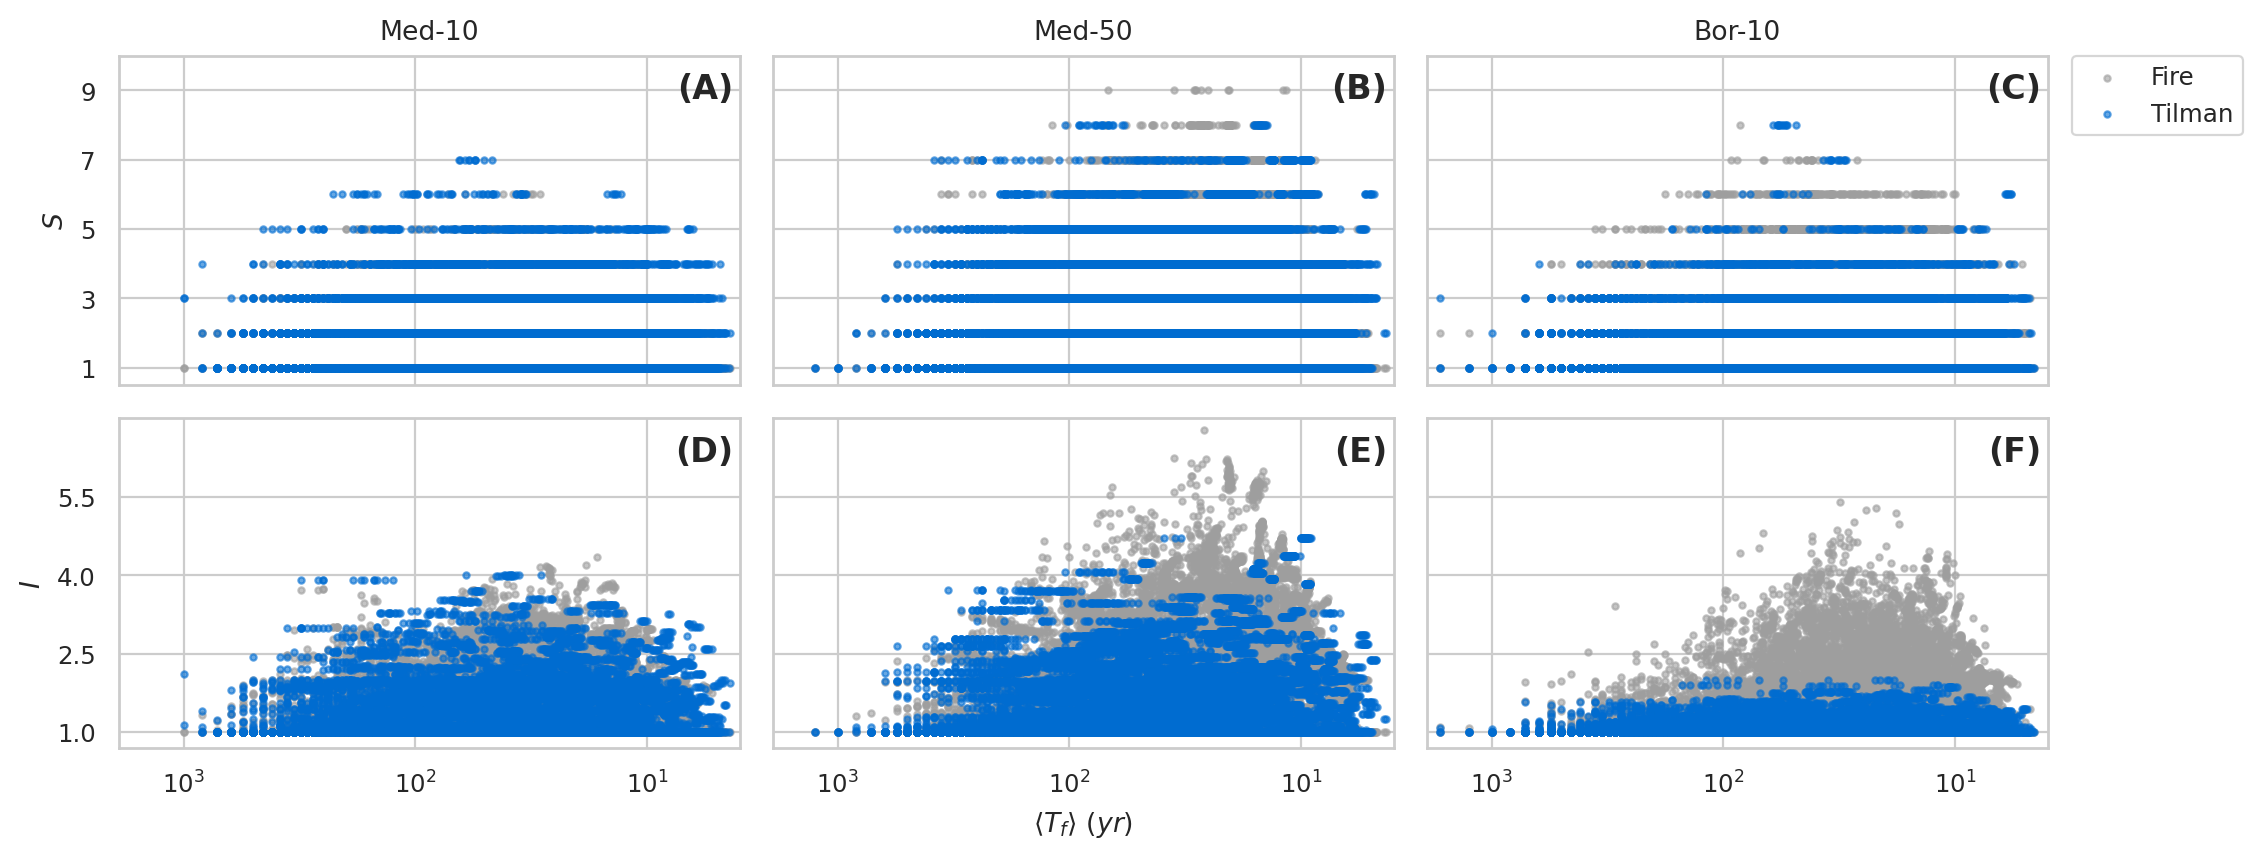

In [50]:
fig, ax2 = plt.subplots(2,3, figsize=(12,5), sharex='col', sharey='row', dpi=200)

n=10
i = 0
biome='med'
data = df3[(df3['N'] == n) & (df3['biome'] == biome)]
ax2[0,i].scatter('frt', 'srich_fire', data=data, s=sz, alpha=al, c=colors3[0], label='Fire')
ax2[1,i].scatter('frt', 'isimp_fire', data=data, s=sz, alpha=al, c=colors3[0], label='')
ax2[0,i].scatter('frt', 'srich_comp', data=data, s=sz, alpha=al, c=colors3[1], label='Tilman')
ax2[1,i].scatter('frt', 'isimp_comp', data=data, s=sz, alpha=al, c=colors3[1], label='')

n=50
i = 1
biome='med'
data = df3[(df3['N'] == n) & (df3['biome'] == biome)]
ax2[0,i].scatter('frt', 'srich_fire', data=data, s=sz, alpha=al, c=colors3[0], label='Fire')
ax2[1,i].scatter('frt', 'isimp_fire', data=data, s=sz, alpha=al, c=colors3[0], label='')
ax2[0,i].scatter('frt', 'srich_comp', data=data, s=sz, alpha=al, c=colors3[1], label='Tilman')
ax2[1,i].scatter('frt', 'isimp_comp', data=data, s=sz, alpha=al, c=colors3[1], label='')

n=10
i = 2
biome='bor'
data = df3[(df3['N'] == n) & (df3['biome'] == biome)]
ax2[0,i].scatter('frt', 'srich_fire', data=data, s=sz, alpha=al, c=colors3[0], label='Fire')
ax2[1,i].scatter('frt', 'isimp_fire', data=data, s=sz, alpha=al, c=colors3[0], label='')
ax2[0,i].scatter('frt', 'srich_comp', data=data, s=sz, alpha=al, c=colors3[1], label='Tilman')
ax2[1,i].scatter('frt', 'isimp_comp', data=data, s=sz, alpha=al, c=colors3[1], label='')

# fix the aesthetic of the plot
# Add a single x-label at the bottom

ax2[1,1].set_xlabel(r"$\langle T_f \rangle$ ($yr$)")

axs = ax2.flatten()
for ax in axs:
    ax.invert_xaxis()
    ax.set(xlim=(np.log10(frt_max),np.log10(frt_min)))
    ticks = [1, 2, 3]
    ax.set_xticks(ticks)
    ax.set_xticklabels([fr'$10^{i}$' for i in ticks])

for ax in ax2[0]:
    ax.set_yticks(np.arange(1.0, 10, 2))
    ax.set_ylim([0.5,10.0])
    ax.set_ylabel("$S$")
    ax.label_outer()

for ax in ax2[1]:
    ax.set_yticks(np.arange(1.0, 7.0, 1.5))
    ax.set_ylim([0.7,7.0])
    ax.set_ylabel("$I$")
    ax.label_outer()

ax2[0,0].set_title('Med-10')
ax2[0,1].set_title('Med-50')
ax2[0,2].set_title('Bor-10')

# Add identifying letters to each subplot, positioned at the top-right corner
letters = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)']
for i, ax in enumerate(ax2.flat):
    ax.text(0.99, 0.95, letters[i], transform=ax.transAxes, fontsize=12, fontweight='bold', 
            va='top', ha='right')

ax2[0,-1].legend(bbox_to_anchor=(1.04, 1), loc="upper left", borderaxespad=0)
# ax2[0,0].legend()

plt.tight_layout(w_pad=0.4, h_pad=0.4)
plt.savefig("figure5_v2.png", bbox_inches="tight", dpi=dpi, transparent=transparent)

In [ ]:
def plot_qreg_cdiv_fire(df, ax2, i, n, biome, quantiles=[.75, .85, .95], colorq=['crimson','gold','cornflowerblue'], orientation='v', verbose=True):

    if orientation=='v':
        ax2[1,0].set_ylabel("$S$")
        ax2[1,1].set_ylabel("$I$")
    elif orientation=='o':
        ax2[0,0].set_ylabel("$S$")
        ax2[1,0].set_ylabel("$I$")

    if verbose:
        print(f'n={n}, {biome}')

    if np.any(df):

        data = df[(df['N'] == n) & (df['biome'] == biome)]

        # QUANTILE REGRESSION

        x_p = np.linspace(data.frt.min(), data.frt.max(), 100)

        for q,cq in zip(quantiles,colorq):
            if verbose:
                print(f'Quantile={q}')
                print('Species Richness')
            X = data['frt']
            Y = data['srich_fire']
            best_degree, best_model, best_aic = best_poly_quantile_regression(Y, X, quantile=q, max_degree=5, verbose=verbose)
            df_pred = pd.DataFrame({'X': x_p})
            # Add the necessary polynomial terms up to the best degree found
            for degree in range(2, best_degree + 1):
                df_pred[f'np.power(X, {degree})'] = np.power(df_pred['X'], degree)

            if orientation=='v':
                ax2[i,0].plot(x_p, best_model.predict(df_pred), linestyle='-', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))
            elif orientation=='o':
                ax2[0,i].plot(x_p, best_model.predict(df_pred), linestyle='-', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))

            if verbose:
                print('Inverse Simpson Index')
            Y = data['isimp_fire']
            best_degree, best_model, best_aic = best_poly_quantile_regression(Y, X, quantile=q, max_degree=5, verbose=verbose)
            df_pred = pd.DataFrame({'X': x_p})
            # Add the necessary polynomial terms up to the best degree found
            for degree in range(2, best_degree + 1):
                df_pred[f'np.power(X, {degree})'] = np.power(df_pred['X'], degree)
            
            if orientation=='v':
                ax2[i,1].plot(x_p, best_model.predict(df_pred), linestyle='-', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))
            elif orientation=='o':
                ax2[1,i].plot(x_p, best_model.predict(df_pred), linestyle='-', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))


In [ ]:
def plot_qreg_cdiv_comp(df, ax2, i, n, biome, quantiles=[.75, .85, .95], colorq=['crimson','gold','cornflowerblue'], orientation='v', verbose=True):

    if orientation=='v':
        ax2[1,0].set_ylabel("$S$")
        ax2[1,1].set_ylabel("$I$")
    elif orientation=='o':
        ax2[0,0].set_ylabel("$S$")
        ax2[1,0].set_ylabel("$I$")

    if verbose:
        print(f'n={n}, {biome}')

    if np.any(df):

        data = df[(df['N'] == n) & (df['biome'] == biome)]

        # QUANTILE REGRESSION

        x_p = np.linspace(data.frt.min(), data.frt.max(), 100)

        for q,cq in zip(quantiles,colorq):
            if verbose:
                print(f'Quantile={q}')
                print('Species Richness')
            X = data['frt']
            Y = data['srich_comp']
            best_degree, best_model, best_aic = best_poly_quantile_regression(Y, X, quantile=q, max_degree=5, verbose=verbose)
            if best_degree is None:
                continue
            df_pred = pd.DataFrame({'X': x_p})
            # Add the necessary polynomial terms up to the best degree found
            for degree in range(2, best_degree + 1):
                df_pred[f'np.power(X, {degree})'] = np.power(df_pred['X'], degree)

            if orientation=='v':
                ax2[i,0].plot(x_p, best_model.predict(df_pred), linestyle='--', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))
            elif orientation=='o':
                ax2[0,i].plot(x_p, best_model.predict(df_pred), linestyle='--', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))

            if verbose:
                print('Inverse Simpson Index')
            Y = data['isimp_comp']
            best_degree, best_model, best_aic = best_poly_quantile_regression(Y, X, quantile=q, max_degree=5, verbose=verbose)
            if best_degree is None:
                continue
            df_pred = pd.DataFrame({'X': x_p})
            # Add the necessary polynomial terms up to the best degree found
            for degree in range(2, best_degree + 1):
                df_pred[f'np.power(X, {degree})'] = np.power(df_pred['X'], degree)
            
            if orientation=='v':
                ax2[i,1].plot(x_p, best_model.predict(df_pred), linestyle='--', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))
            elif orientation=='o':
                ax2[1,i].plot(x_p, best_model.predict(df_pred), linestyle='--', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))


In [ ]:
# colorq = ['purple', 'darkorange', 'forestgreen']
# quantiles = [.9, .95, .99]

n=10, med
Quantile=0.85
Species Richness
Best Polynomial Degree: 4 with AIC = 68556.7477

Inverse Simpson Index
Best Polynomial Degree: 2 with AIC = 43308.9496

Quantile=0.9
Species Richness
Best Polynomial Degree: None with AIC = inf

Quantile=0.95
Species Richness
Best Polynomial Degree: 5 with AIC = 84309.1551

Inverse Simpson Index
Best Polynomial Degree: 5 with AIC = 60120.1849

n=10, med
Quantile=0.85
Species Richness
Best Polynomial Degree: 5 with AIC = 60769.4562

Inverse Simpson Index
Best Polynomial Degree: 2 with AIC = 46895.3713

Quantile=0.9
Species Richness


/work/users/mtorrassa/miniforge3/envs/env_biofire/lib/python3.12/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (350000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


Best Polynomial Degree: 5 with AIC = 71146.8521

Inverse Simpson Index
Best Polynomial Degree: 4 with AIC = 53450.2090

Quantile=0.95
Species Richness
Best Polynomial Degree: 3 with AIC = 75857.1596

Inverse Simpson Index
Best Polynomial Degree: 5 with AIC = 60675.4103

n=50, med
Quantile=0.85
Species Richness
Best Polynomial Degree: 5 with AIC = 146448.2469

Inverse Simpson Index
Best Polynomial Degree: 5 with AIC = 92471.8686

Quantile=0.9
Species Richness
Best Polynomial Degree: 3 with AIC = 163013.3994

Inverse Simpson Index
Best Polynomial Degree: 2 with AIC = 106610.7172

Quantile=0.95
Species Richness
Best Polynomial Degree: 5 with AIC = 168768.0054

Inverse Simpson Index
Best Polynomial Degree: 4 with AIC = 125548.8087

n=50, med
Quantile=0.85
Species Richness
Best Polynomial Degree: 3 with AIC = 140133.7847

Inverse Simpson Index
Best Polynomial Degree: 2 with AIC = 103912.0585

Quantile=0.9
Species Richness
Best Polynomial Degree: 2 with AIC = 147841.8735

Inverse Simpson Ind

/work/users/mtorrassa/miniforge3/envs/env_biofire/lib/python3.12/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (350000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


Best Polynomial Degree: 4 with AIC = 78140.4147

Inverse Simpson Index
Best Polynomial Degree: 1 with AIC = 15240.3207

n=10, bor
Quantile=0.85
Species Richness
Best Polynomial Degree: 4 with AIC = 66635.2305

Inverse Simpson Index
Best Polynomial Degree: 4 with AIC = 46105.5702

Quantile=0.9
Species Richness
Best Polynomial Degree: 5 with AIC = 70570.1100

Inverse Simpson Index
Best Polynomial Degree: 5 with AIC = 51544.2910

Quantile=0.95
Species Richness
Best Polynomial Degree: 5 with AIC = 79336.9187

Inverse Simpson Index
Best Polynomial Degree: 5 with AIC = 59085.4846



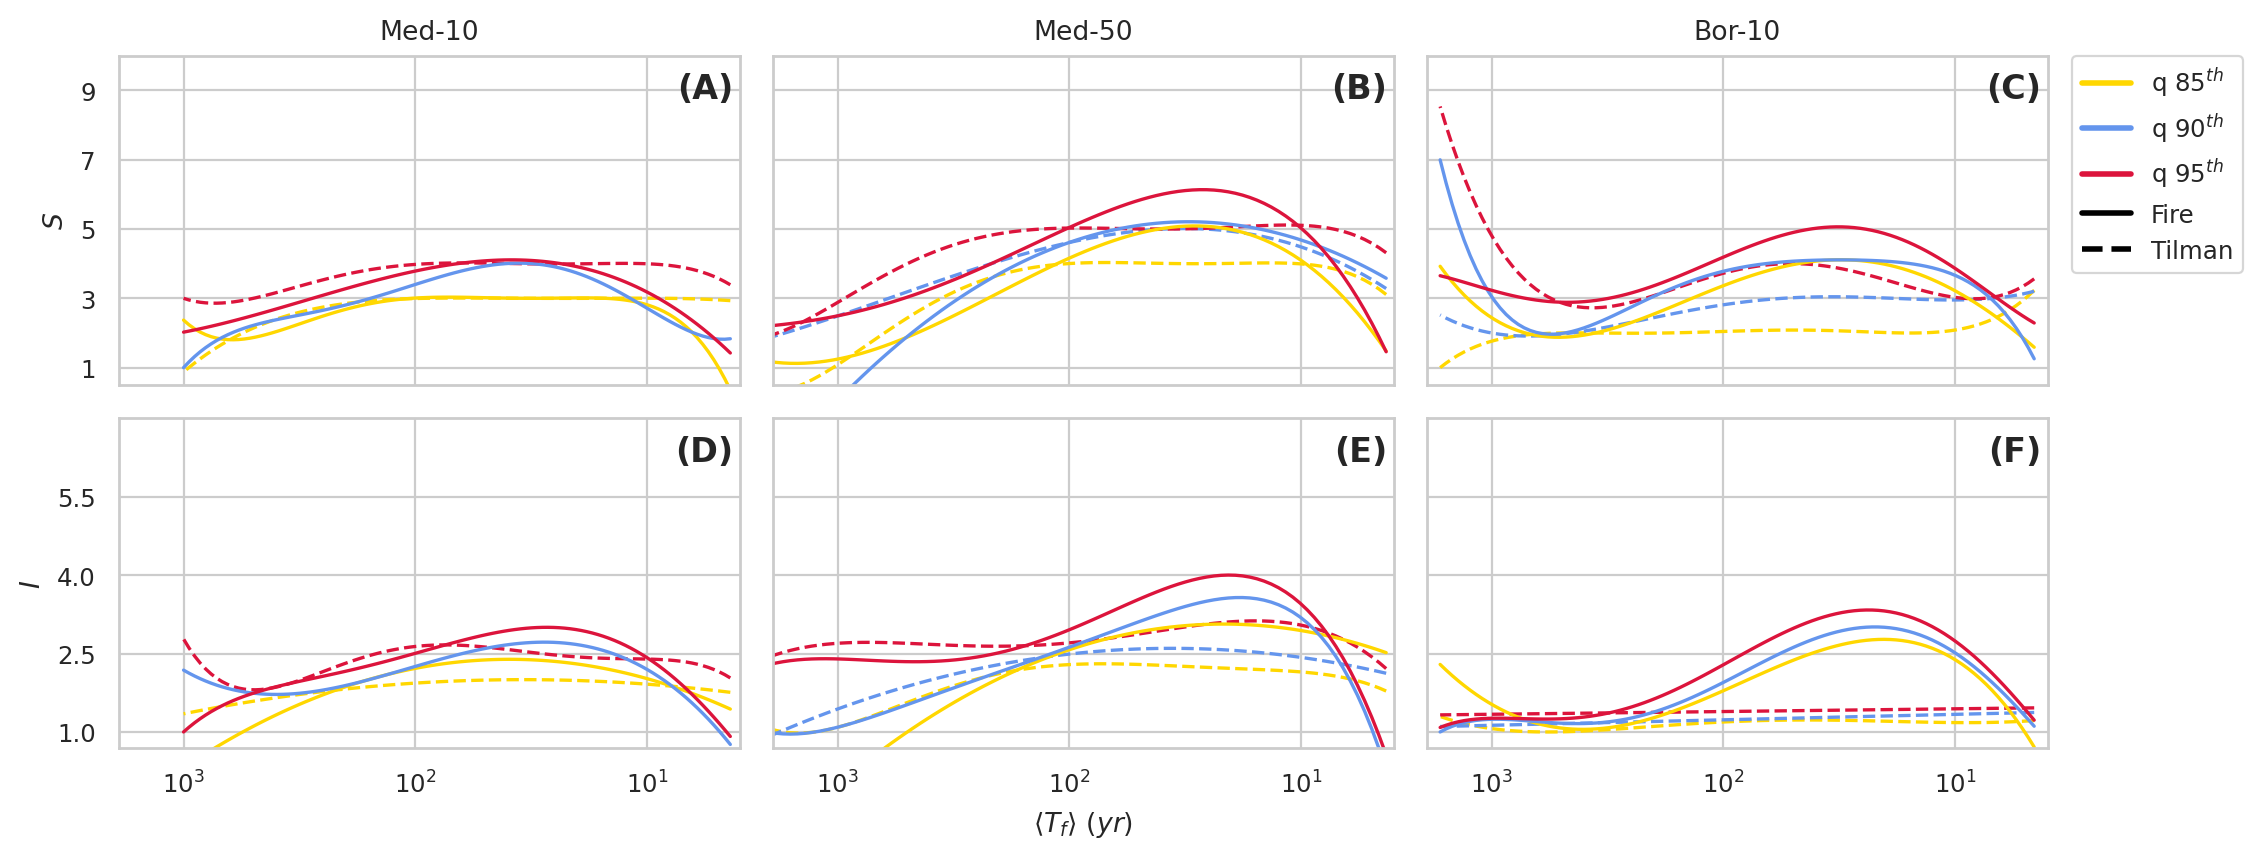

In [ ]:
fig, ax2 = plt.subplots(2,3, figsize=(12,5), sharex=True, sharey='row', dpi=200)

n=10
i = 0
biome='med'
plot_qreg_cdiv_comp(df3, ax2, i, n, biome, quantiles, colorq, orientation='o', verbose=True)
plot_qreg_cdiv_fire(df3, ax2, i, n, biome, quantiles, colorq, orientation='o', verbose=True)

n=50
i = 1
biome='med'
plot_qreg_cdiv_comp(df3, ax2, i, n, biome, quantiles, colorq, orientation='o', verbose=True)
plot_qreg_cdiv_fire(df3, ax2, i, n, biome, quantiles, colorq, orientation='o', verbose=True)

n=10
i = 2
biome='bor'
plot_qreg_cdiv_comp(df3, ax2, i, n, biome, quantiles, colorq, orientation='o', verbose=True)
plot_qreg_cdiv_fire(df3, ax2, i, n, biome, quantiles, colorq, orientation='o', verbose=True)

# fix the aesthetic of the plot
# Add a single x-label at the bottom

ax2[1,1].set_xlabel(r"$\langle T_f \rangle$ ($yr$)")

axs = ax2.flatten()
for ax in axs:
    ax.invert_xaxis()
    ax.set(xlim=(np.log10(frt_max),np.log10(frt_min)))
    ticks = [1, 2, 3]
    ax.set_xticks(ticks)
    ax.set_xticklabels([fr'$10^{i}$' for i in ticks])

for ax in ax2[0]:
    ax.set_yticks(np.arange(1.0, 10, 2))
    ax.set_ylim([0.5,10.0])

for ax in ax2[1]:
    ax.set_yticks(np.arange(1.0, 7.0, 1.5))
    ax.set_ylim([0.7,7.0])

ax2[0,0].set_title('Med-10')
ax2[0,1].set_title('Med-50')
ax2[0,2].set_title('Bor-10')

# Add identifying letters to each subplot, positioned at the top-right corner
letters = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)']
for i, ax in enumerate(ax2.flat):
    ax.text(0.99, 0.95, letters[i], transform=ax.transAxes, fontsize=12, fontweight='bold', 
            va='top', ha='right')

# handles, labels = ax2[0,-1].get_legend_handles_labels()
# ax2[0,-1].legend(handles[:len(colors)*len(linestyles)], labels[:len(colors)*len(linestyles)], fontsize=8)
tot_handles = [Line2D([0], [0], color=c, lw=2) for c in colorq] + [Line2D([0], [0], color='black', lw=2, linestyle=ls) for ls in linestyles]
tot_labels = ['q {}{}'.format(int(q*100), r'$^{th}$') for q in quantiles] + names

legend = ax2[0,-1].legend(tot_handles, tot_labels, bbox_to_anchor=(1.04, 1), loc="upper left", borderaxespad=0)

# ax2[0,-1].legend(bbox_to_anchor=(1.15, 1), loc="upper left", borderaxespad=0)
# ax2[0,0].legend()

plt.tight_layout(w_pad=0.4, h_pad=0.4)
plt.savefig("figure5.png", bbox_inches="tight", dpi=dpi, transparent=transparent)

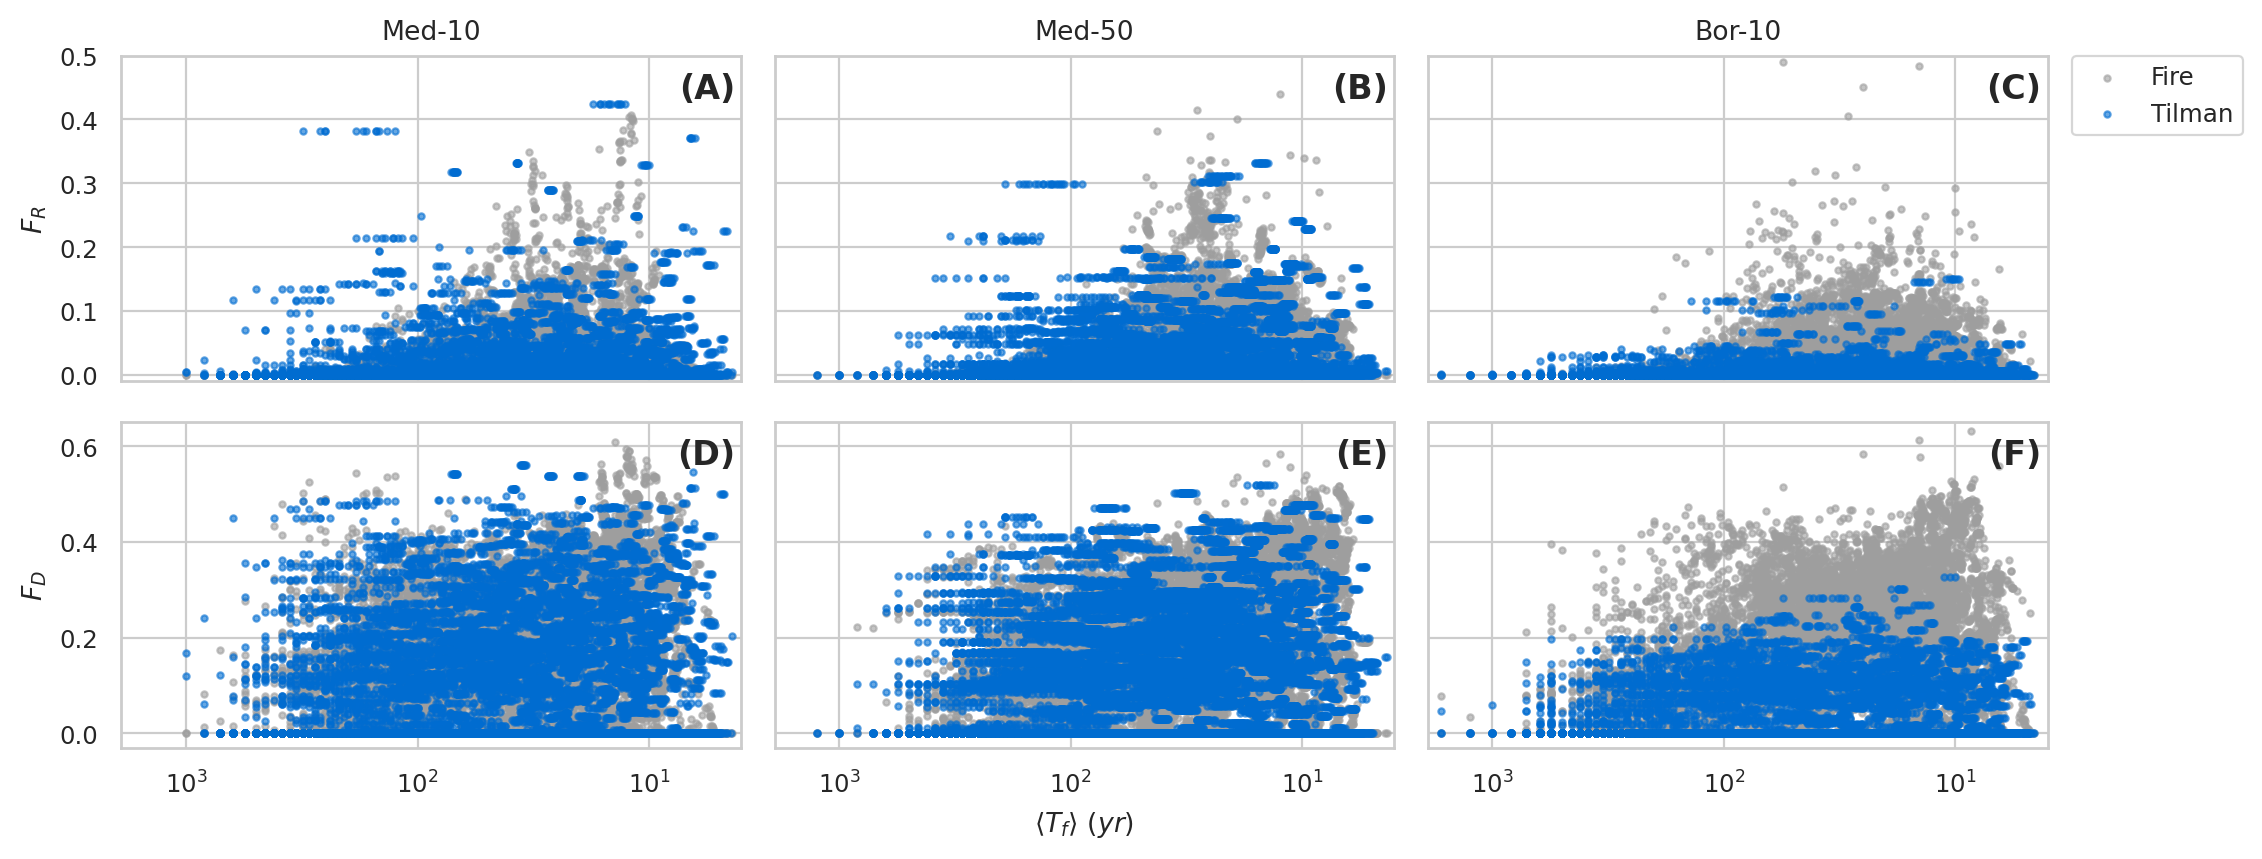

In [51]:
fig, ax2 = plt.subplots(2,3, figsize=(12,5), sharex='col', sharey='row', dpi=200)

n=10
i = 0
biome='med'
data = df3[(df3['N'] == n) & (df3['biome'] == biome)]
ax2[0,i].scatter('frt', 'frich_fire', data=data, s=sz, alpha=al, c=colors3[0], label='Fire')
ax2[1,i].scatter('frt', 'fdiv_fire', data=data, s=sz, alpha=al, c=colors3[0], label='')
ax2[0,i].scatter('frt', 'frich_comp', data=data, s=sz, alpha=al, c=colors3[1], label='Tilman')
ax2[1,i].scatter('frt', 'fdiv_comp', data=data, s=sz, alpha=al, c=colors3[1], label='')

n=50
i = 1
biome='med'
data = df3[(df3['N'] == n) & (df3['biome'] == biome)]
ax2[0,i].scatter('frt', 'frich_fire', data=data, s=sz, alpha=al, c=colors3[0], label='Fire')
ax2[1,i].scatter('frt', 'fdiv_fire', data=data, s=sz, alpha=al, c=colors3[0], label='')
ax2[0,i].scatter('frt', 'frich_comp', data=data, s=sz, alpha=al, c=colors3[1], label='Tilman')
ax2[1,i].scatter('frt', 'fdiv_comp', data=data, s=sz, alpha=al, c=colors3[1], label='')

n=10
i = 2
biome='bor'
data = df3[(df3['N'] == n) & (df3['biome'] == biome)]
ax2[0,i].scatter('frt', 'frich_fire', data=data, s=sz, alpha=al, c=colors3[0], label='Fire')
ax2[1,i].scatter('frt', 'fdiv_fire', data=data, s=sz, alpha=al, c=colors3[0], label='')
ax2[0,i].scatter('frt', 'frich_comp', data=data, s=sz, alpha=al, c=colors3[1], label='Tilman')
ax2[1,i].scatter('frt', 'fdiv_comp', data=data, s=sz, alpha=al, c=colors3[1], label='')

# fix the aesthetic of the plot
# Add a single x-label at the bottom

ax2[1,1].set_xlabel(r"$\langle T_f \rangle$ ($yr$)")

axs = ax2.flatten()
for ax in axs:
    ax.invert_xaxis()
    ax.set(xlim=(np.log10(frt_max),np.log10(frt_min)))
    ticks = [1, 2, 3]
    ax.set_xticks(ticks)
    ax.set_xticklabels([fr'$10^{i}$' for i in ticks])

# Fix Y-ticks - Functional Richness
for ax in ax2[0]:
    ax.set_yticks(np.arange(0.0, 0.51, 0.1))
    ax.set_ylim([-0.01,0.5])
    ax.set_ylabel("$F_R$")
    ax.label_outer()

# Fix Y-ticks - Functional Divergence
for ax in ax2[1]:
    ax.set_yticks(np.arange(0.0, 0.7, 0.2))
    ax.set_ylim([-0.03,0.65])
    ax.set_ylabel("$F_D$")
    ax.label_outer()

ax2[0,0].set_title('Med-10')
ax2[0,1].set_title('Med-50')
ax2[0,2].set_title('Bor-10')

# Add identifying letters to each subplot, positioned at the top-right corner
letters = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)']
for i, ax in enumerate(ax2.flat):
    ax.text(0.99, 0.95, letters[i], transform=ax.transAxes, fontsize=12, fontweight='bold', 
            va='top', ha='right')

ax2[0,-1].legend(bbox_to_anchor=(1.04, 1), loc="upper left", borderaxespad=0)
# ax2[0,0].legend()

plt.tight_layout(w_pad=0.4, h_pad=0.4)
plt.savefig("figure7_v2.png", bbox_inches="tight", dpi=dpi, transparent=transparent)

In [35]:
def plot_qreg_fdiv_fire(df, ax2, i, n, biome, quantiles=[.95, .85, .75], colorq=['crimson','gold','cornflowerblue'], orientation='o', verbose=True):

    if orientation=='v':
        ax2[1,0].set_ylabel("$F_R$")
        ax2[1,1].set_ylabel("$F_D$")
    elif orientation=='o':
        ax2[0,0].set_ylabel("$F_R$")
        ax2[1,0].set_ylabel("$F_D$")
    

    if verbose:
        print(f'n={n}, {biome}')

    if np.any(df):

        data = df[(df['N'] == n) & (df['biome'] == biome)]

        # QUANTILE REGRESSION

        x_p = np.linspace(data.frt.min(), data.frt.max(), 100)

        for q,cq in zip(quantiles,colorq):
            if verbose:
                print(f'Quantile={q}')

            X = data['frt']

            if verbose:
                print('Functional Richness')

            Y = data['frich_fire']
            best_degree, best_model, best_aic = best_poly_quantile_regression(Y, X, quantile=q, max_degree=5, verbose=verbose)
            df_pred = pd.DataFrame({'X': x_p})
            # Add the necessary polynomial terms up to the best degree found
            for degree in range(2, best_degree + 1):
                df_pred[f'np.power(X, {degree})'] = np.power(df_pred['X'], degree)
            if orientation=='v':
                ax2[i,0].plot(x_p, best_model.predict(df_pred), linestyle='-', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))
            elif orientation=='o':
                ax2[0,i].plot(x_p, best_model.predict(df_pred), linestyle='-', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))

            if verbose:
                print('Functional Divergence')

            Y = data['fdiv_fire']
            best_degree, best_model, best_aic = best_poly_quantile_regression(Y, X, quantile=q, max_degree=5, verbose=verbose)
            df_pred = pd.DataFrame({'X': x_p})
            # Add the necessary polynomial terms up to the best degree found
            for degree in range(2, best_degree + 1):
                df_pred[f'np.power(X, {degree})'] = np.power(df_pred['X'], degree)
            if orientation=='v':
                ax2[i,1].plot(x_p, best_model.predict(df_pred), linestyle='-', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))
            elif orientation=='o':
                ax2[1,i].plot(x_p, best_model.predict(df_pred), linestyle='-', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))


In [36]:
def plot_qreg_fdiv_comp(df, ax2, i, n, biome, quantiles=[.95, .85, .75], colorq=['crimson','gold','cornflowerblue'], orientation='o', verbose=True):

    if orientation=='v':
        ax2[1,0].set_ylabel("$F_R$")
        ax2[1,1].set_ylabel("$F_D$")
    elif orientation=='o':
        ax2[0,0].set_ylabel("$F_R$")
        ax2[1,0].set_ylabel("$F_D$")
    

    if verbose:
        print(f'n={n}, {biome}')

    if np.any(df):

        data = df[(df['N'] == n) & (df['biome'] == biome)]
        
        # QUANTILE REGRESSION

        x_p = np.linspace(data.frt.min(), data.frt.max(), 100)

        for q,cq in zip(quantiles,colorq):
            if verbose:
                print(f'Quantile={q}')

            X = data['frt']

            if verbose:
                print('Functional Richness')

            Y = data['frich_comp']
            best_degree, best_model, best_aic = best_poly_quantile_regression(Y, X, quantile=q, max_degree=5, verbose=verbose)
            df_pred = pd.DataFrame({'X': x_p})
            # Add the necessary polynomial terms up to the best degree found
            for degree in range(2, best_degree + 1):
                df_pred[f'np.power(X, {degree})'] = np.power(df_pred['X'], degree)
            if orientation=='v':
                ax2[i,0].plot(x_p, best_model.predict(df_pred), linestyle='--', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))
            elif orientation=='o':
                ax2[0,i].plot(x_p, best_model.predict(df_pred), linestyle='--', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))

            if verbose:
                print('Functional Divergence')

            Y = data['fdiv_comp']
            best_degree, best_model, best_aic = best_poly_quantile_regression(Y, X, quantile=q, max_degree=5, verbose=verbose)
            df_pred = pd.DataFrame({'X': x_p})
            # Add the necessary polynomial terms up to the best degree found
            for degree in range(2, best_degree + 1):
                df_pred[f'np.power(X, {degree})'] = np.power(df_pred['X'], degree)
            if orientation=='v':
                ax2[i,1].plot(x_p, best_model.predict(df_pred), linestyle='--', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))
            elif orientation=='o':
                ax2[1,i].plot(x_p, best_model.predict(df_pred), linestyle='--', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))


n=10, med
Quantile=0.85
Functional Richness


Best Polynomial Degree: 1 with AIC = -68658.9699

Functional Divergence
Best Polynomial Degree: 1 with AIC = -6720.5746

Quantile=0.9
Functional Richness
Best Polynomial Degree: 3 with AIC = -61289.7163

Functional Divergence
Best Polynomial Degree: 3 with AIC = -1274.7264

Quantile=0.95
Functional Richness
Best Polynomial Degree: 3 with AIC = -45571.7107

Functional Divergence
Best Polynomial Degree: 1 with AIC = 5896.5198

n=10, med
Quantile=0.85
Functional Richness
Best Polynomial Degree: 2 with AIC = -65951.7307

Functional Divergence
Best Polynomial Degree: 4 with AIC = -8848.1866

Quantile=0.9
Functional Richness
Best Polynomial Degree: 2 with AIC = -57967.0743

Functional Divergence
Best Polynomial Degree: 4 with AIC = -4708.3203

Quantile=0.95
Functional Richness
Best Polynomial Degree: 3 with AIC = -41580.6341

Functional Divergence
Best Polynomial Degree: 5 with AIC = 1305.5746

n=50, med
Quantile=0.85
Functional Richness
Best Polynomial Degree: 4 with AIC = -106496.2982

Fun

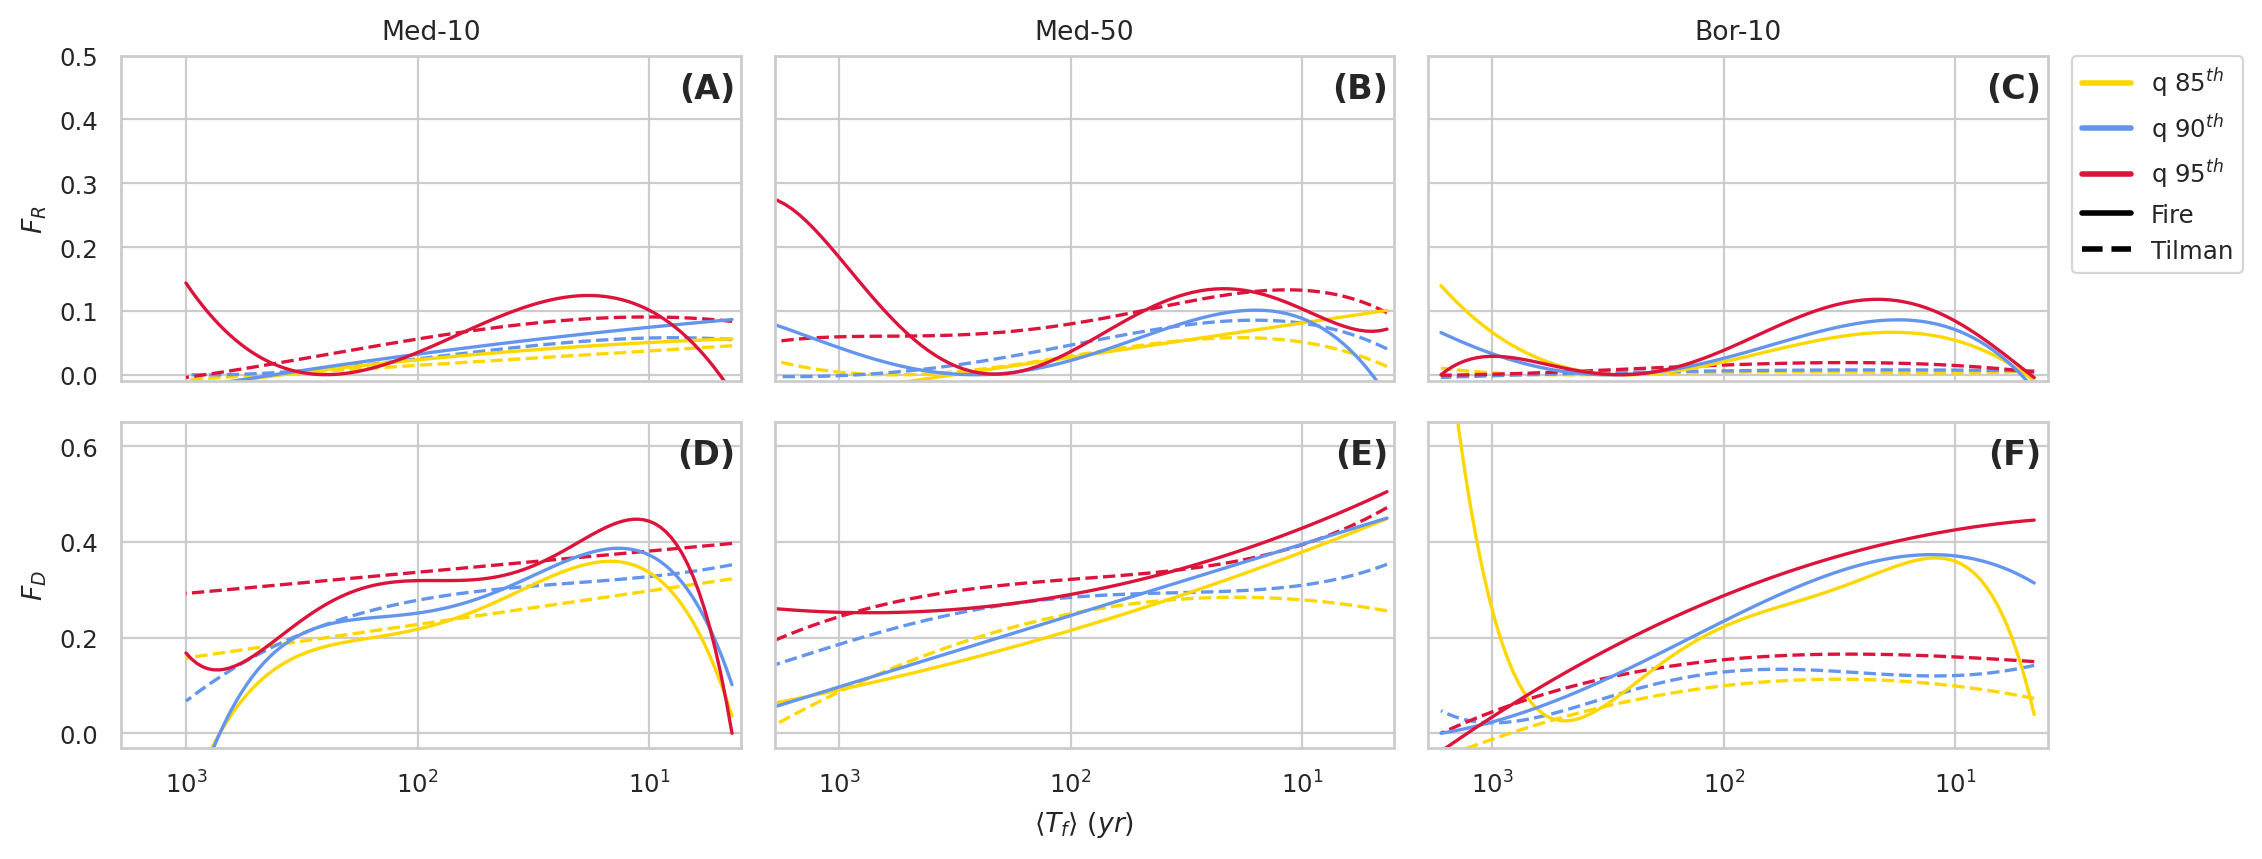

In [37]:
fig, ax2 = plt.subplots(2,3, figsize=(12,5), sharex=True, sharey='row', dpi=200)

n=10
i = 0
biome='med'
plot_qreg_fdiv_comp(df3, ax2, i, n, biome, quantiles, colorq, orientation='o', verbose=True)
plot_qreg_fdiv_fire(df3, ax2, i, n, biome, quantiles, colorq, orientation='o', verbose=True)

n=50
i = 1
biome='med'
plot_qreg_fdiv_comp(df3, ax2, i, n, biome, quantiles, colorq, orientation='o', verbose=True)
plot_qreg_fdiv_fire(df3, ax2, i, n, biome, quantiles, colorq, orientation='o', verbose=True)

n=10
i = 2
biome='bor'
plot_qreg_fdiv_comp(df3, ax2, i, n, biome, quantiles, colorq, orientation='o', verbose=True)
plot_qreg_fdiv_fire(df3, ax2, i, n, biome, quantiles, colorq, orientation='o', verbose=True)

# fix the aesthetic of the plot
# Add a single x-label at the bottom

ax2[1,1].set_xlabel(r"$\langle T_f \rangle$ ($yr$)")

axs = ax2.flatten()
for ax in axs:
    ax.invert_xaxis()
    ax.set(xlim=(np.log10(frt_max),np.log10(frt_min)))
    ticks = [1, 2, 3]
    ax.set_xticks(ticks)
    ax.set_xticklabels([fr'$10^{i}$' for i in ticks])

# Fix Y-ticks - Functional Richness
for ax in ax2[0]:
    ax.set_yticks(np.arange(0.0, 0.51, 0.1))
    ax.set_ylim([-0.01,0.5])

# Fix Y-ticks - Functional Divergence
for ax in ax2[1]:
    ax.set_yticks(np.arange(0.0, 0.7, 0.2))
    ax.set_ylim([-0.03,0.65])

ax2[0,0].set_title('Med-10')
ax2[0,1].set_title('Med-50')
ax2[0,2].set_title('Bor-10')

# Add identifying letters to each subplot, positioned at the top-right corner
letters = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)']
for i, ax in enumerate(ax2.flat):
    ax.text(0.99, 0.95, letters[i], transform=ax.transAxes, fontsize=12, fontweight='bold', 
            va='top', ha='right')

# handles, labels = ax2[0,-1].get_legend_handles_labels()
# ax2[0,-1].legend(handles[:len(colors)*len(linestyles)], labels[:len(colors)*len(linestyles)], fontsize=8)
tot_handles = [Line2D([0], [0], color=c, lw=2) for c in colorq] + [Line2D([0], [0], color='black', lw=2, linestyle=ls) for ls in linestyles]
tot_labels = ['q {}{}'.format(int(q*100), r'$^{th}$') for q in quantiles] + names

legend = ax2[0,-1].legend(tot_handles, tot_labels, bbox_to_anchor=(1.04, 1), loc="upper left", borderaxespad=0)

# ax2[0,-1].legend(bbox_to_anchor=(1.15, 1), loc="upper left", borderaxespad=0)
# ax2[0,0].legend()

plt.tight_layout(w_pad=0.4, h_pad=0.4)
plt.savefig("figure7.png", bbox_inches="tight", dpi=dpi, transparent=transparent)

### Comparing mean values distributions

In [6]:
data = pd.read_csv(os.path.join(fpath_dir, 'coms-fire-bioindex-fd.csv'))
data['eco-type'] = data['biome'] + data['N'].astype(str)
data.loc[data['eco-type']=='med10','eco-type'] = 'Med-10'
data.loc[data['eco-type']=='med50','eco-type'] = 'Med-50'
data.loc[data['eco-type']=='bor10','eco-type'] = 'Bor-10'
data

Unnamed: 0.1  Unnamed: 0 biome   N  ncom  init        frt  srichness  \
0                 0           0   med  10     1     1   9.041592          2   
1                 1           1   med  10     1     2   8.620689          2   
2                 2           2   med  10     1     3   8.880995          2   
3                 3           3   med  10     1     4   8.333333          2   
4                 4           4   med  10     1     5   8.771930          2   
...             ...         ...   ...  ..   ...   ...        ...        ...   
69684         69684        2589   med  50  1000    42  98.039215          1   
69685         69685        2590   med  50  1000    43  87.719299          1   
69686         69686        2594   med  50  1000    47  79.365082          1   
69687         69687        2595   med  50  1000    48  94.339623          1   
69688         69688        2597   med  50  1000    50  84.745766          1   

       isimpson  frichness  fdivergence eco-type  
0      1.595753   0.059014     0.299894   Med-10  
1      1.596819   0.049272     0.303768   Med-10  
2      1.595444   0.059229     0.299995   Med-10  
3      1.598091   0.045783     0.291815   Med-10  
4      1.595427   0.049090     0.303662   Med-10  
...         ...        ...          ...      ...  
69684  1.000000   0.000000     0.000000   Med-50  
69685  1.000000   0.000000     0.000000   Med-50  
69686  1.000000   0.000000     0.000000   Med-50  
69687  1.000000   0.000000     0.000000   Med-50  
69688  1.000000   0.000000     0.000000   Med-50  

[69689 rows x 12 columns]

In [14]:
data[data['eco-type']=='Med-10']['fdivergence'].median()

0.12488941996369585

In [15]:
data[data['eco-type']=='Bor-10']['fdivergence'].median()

0.1309700275250906

In [16]:
data[data['eco-type']=='Med-50']['fdivergence'].median()

0.18618487714580906

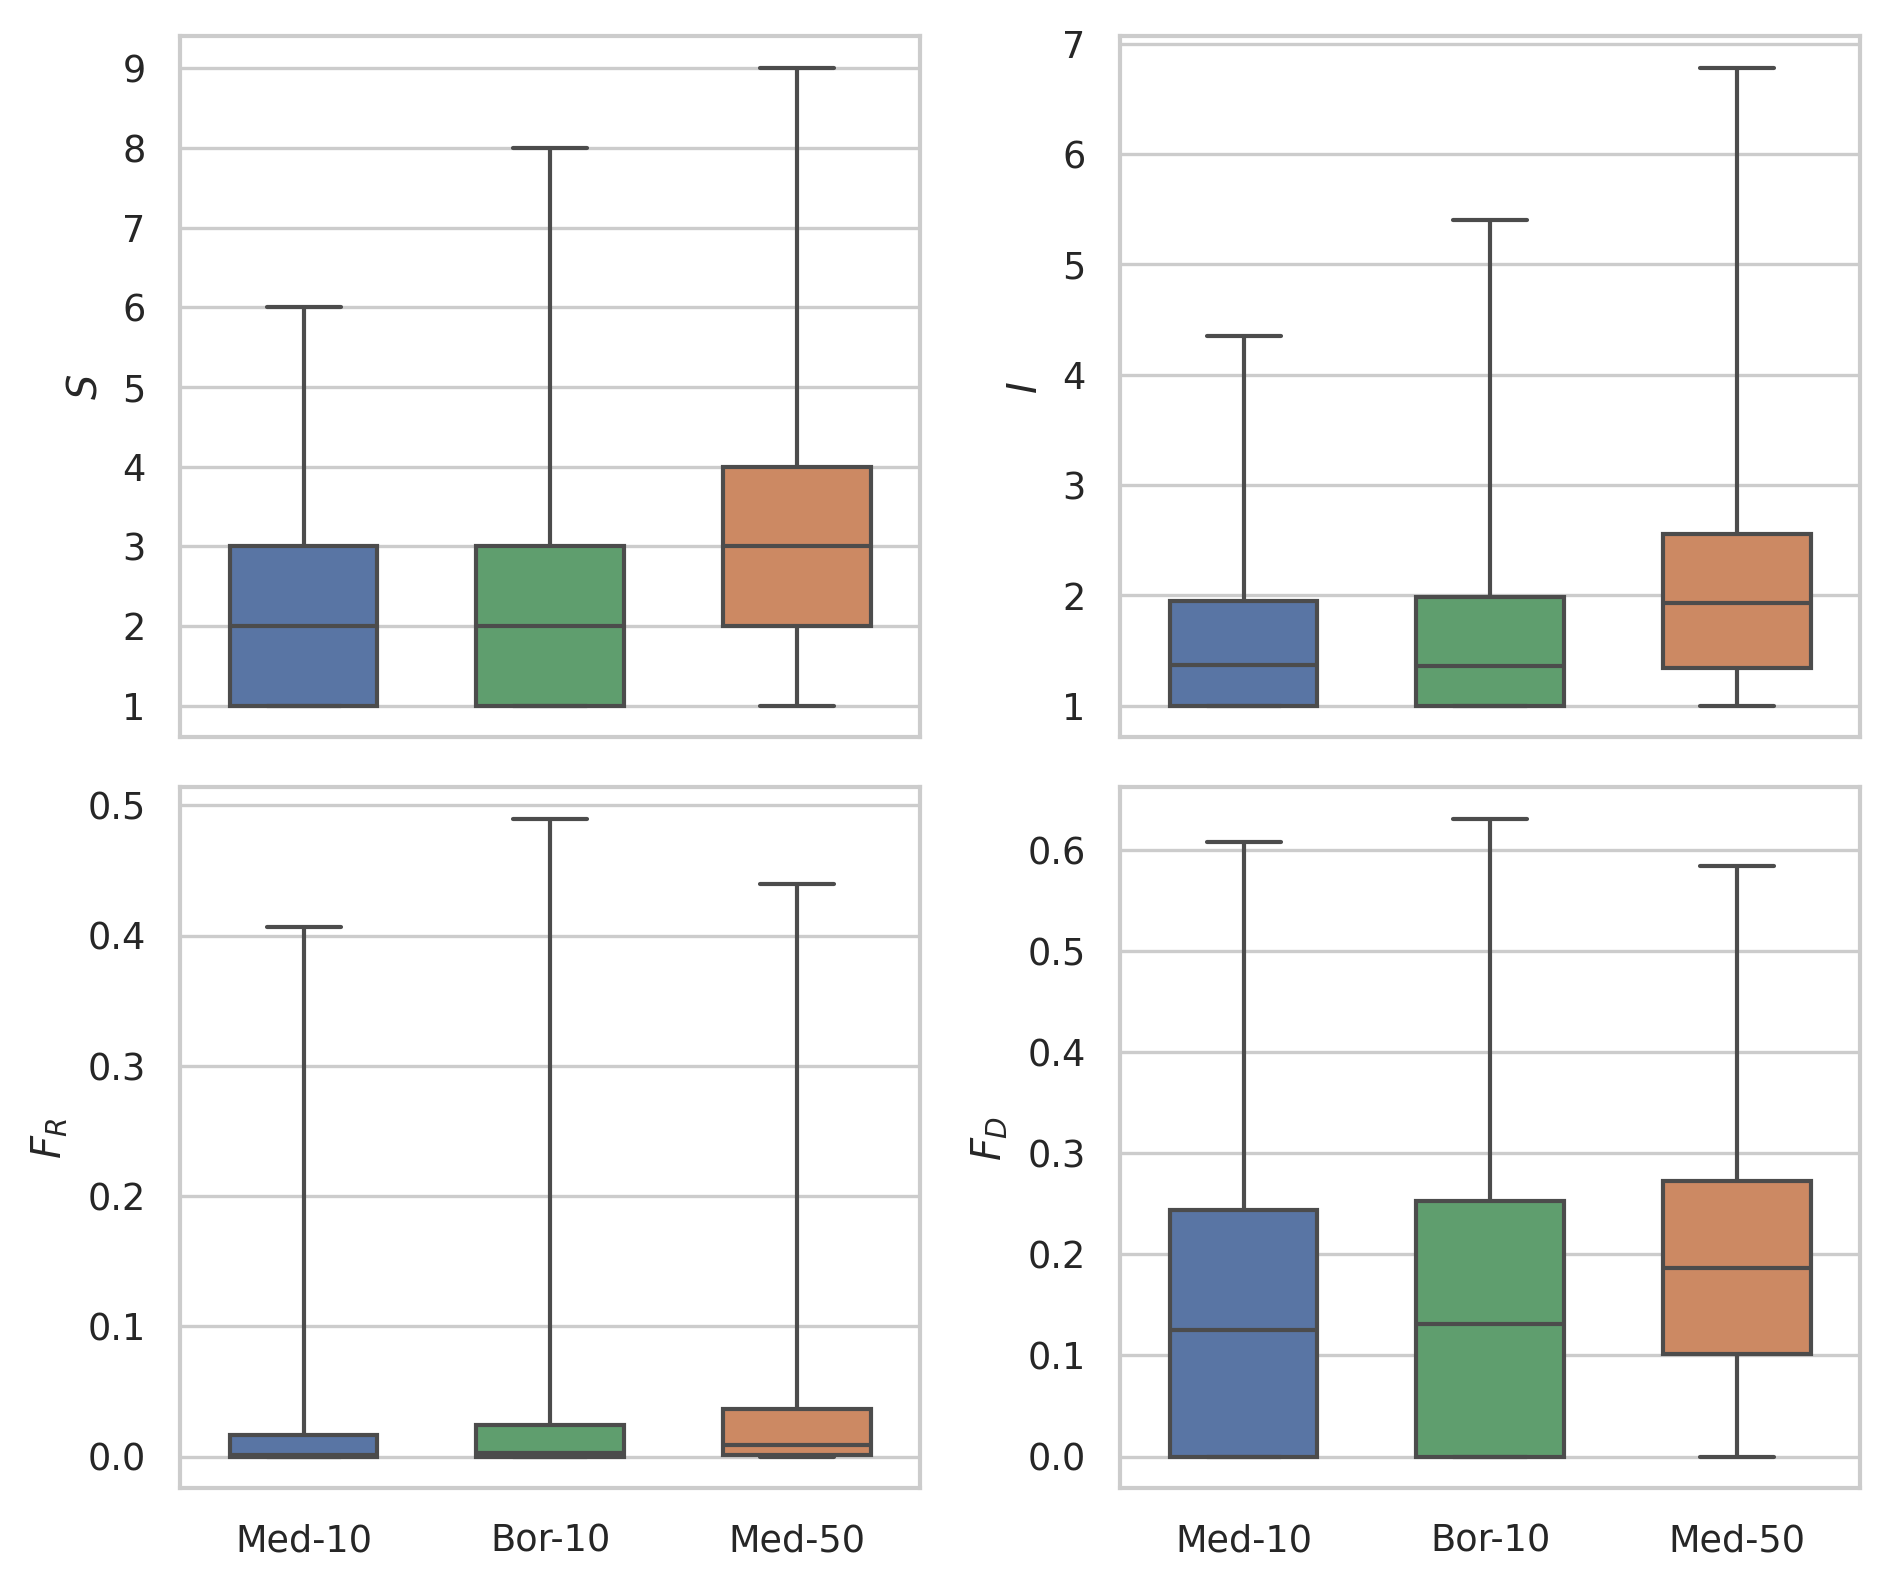

In [ ]:
fig, ax2 = plt.subplots(2,2, figsize=(7,6), sharex=True, dpi=dpi)

hue_order = ['Med-10', 'Med-50', 'Bor-10']

sns.boxplot(data=data, y="srichness", x='eco-type', hue='eco-type', hue_order=hue_order, width=.6, whis=1000, ax=ax2[0,0], legend=False)
# sns.boxplot(data=data, x="srichness", hue='eco-type', hue_order=hue_order, width=.6, ax=ax2[0,0], legend=False)
ax2[0,0].set_ylabel(r'$S$')
ax2[0,0].set_xlim(0, 2)
# ax2[0,0].set_xticks(np.arange(-4, 9, 2))

sns.boxplot(data=data, y="isimpson", x='eco-type', hue='eco-type', hue_order=hue_order, width=.6, whis=1000, ax=ax2[0,1])
ax2[0,1].set_ylabel(r'$I$')
# ax2[0,1].set_xlim(-6.0, 6.0)

box = sns.boxplot(data=data, y="frichness", x='eco-type', hue='eco-type', hue_order=hue_order, width=.6, whis=3000, ax=ax2[1,0], legend=False)
ax2[1,0].set_ylabel(r'$F_R$')
# ax2[1,0].set_yscale('symlog', linthresh=0.001)
# ax2[1,0].set_ylim(-0.0001, 0.9)

sns.boxplot(data=data, y="fdivergence", x='eco-type', hue='eco-type', hue_order=hue_order, width=.6, whis=1000, ax=ax2[1,1], legend=False)
ax2[1,1].set_ylabel(r'$F_D$')
# ax2[1,1].set_xlim(-0.75, 0.75)

# Add identifying letters to each subplot, positioned at the top-right corner
# letters = ['(A)', '(B)', '(C)', '(D)']
# for i, ax in enumerate(ax2.flat):
#     ax.text(0.99, 0.95, letters[i], transform=ax.transAxes, fontsize=12, fontweight='bold', 
#             va='top', ha='right')

# ax2[0,1].legend(bbox_to_anchor=(1.04, 1), loc="upper left", borderaxespad=0)
for ax in ax2.flatten():
    ax.set_xlabel("")

# plt.tight_layout()
plt.tight_layout(w_pad=0.4, h_pad=0.4)
# plt.savefig("median_diversity.png", bbox_inches="tight", dpi=dpi, transparent=transparent)

### Correlation of Biodiversity indicators

In [23]:
data = pd.read_csv(os.path.join(fpath_dir, 'coms-fire-bioindex-fd.csv'))
data['eco-type'] = data['biome'] + data['N'].astype(str)
data.loc[data['eco-type']=='med10','eco-type'] = 'Med-10'
data.loc[data['eco-type']=='med50','eco-type'] = 'Med-50'
data.loc[data['eco-type']=='bor10','eco-type'] = 'Bor-10'
data

Unnamed: 0.1  Unnamed: 0 biome   N  ncom  init        frt  srichness  \
0                 0           0   med  10     1     1   9.041592          2   
1                 1           1   med  10     1     2   8.620689          2   
2                 2           2   med  10     1     3   8.880995          2   
3                 3           3   med  10     1     4   8.333333          2   
4                 4           4   med  10     1     5   8.771930          2   
...             ...         ...   ...  ..   ...   ...        ...        ...   
69684         69684        2589   med  50  1000    42  98.039215          1   
69685         69685        2590   med  50  1000    43  87.719299          1   
69686         69686        2594   med  50  1000    47  79.365082          1   
69687         69687        2595   med  50  1000    48  94.339623          1   
69688         69688        2597   med  50  1000    50  84.745766          1   

       isimpson  frichness  fdivergence eco-type  
0      1.595753   0.059014     0.299894   Med-10  
1      1.596819   0.049272     0.303768   Med-10  
2      1.595444   0.059229     0.299995   Med-10  
3      1.598091   0.045783     0.291815   Med-10  
4      1.595427   0.049090     0.303662   Med-10  
...         ...        ...          ...      ...  
69684  1.000000   0.000000     0.000000   Med-50  
69685  1.000000   0.000000     0.000000   Med-50  
69686  1.000000   0.000000     0.000000   Med-50  
69687  1.000000   0.000000     0.000000   Med-50  
69688  1.000000   0.000000     0.000000   Med-50  

[69689 rows x 12 columns]

In [24]:
# # Define the custom correlation function
# def corrfunc(ax, x, y, method, cmap, norm, scatter_kws):

#     if method == 'pearson' or method is None:
#         r, pval = scs.pearsonr(x, y)
#     elif method == 'spearman':
#         r, pval = scs.spearmanr(x, y)

#     print(r, pval)

#     if pval < 0.05:
#         # Set the regression line color dynamically based on correlation
#         line_color = cmap(norm(r))  # Match line color with heatmap color
#         sns.regplot(x=x, y=y, scatter_kws=scatter_kws, line_kws={'color': line_color, 'linewidth': 2}, ax=ax)
        
#         # Add annotation in the upper-left corner
#         bbox_props = dict(boxstyle="square", edgecolor="black", facecolor=line_color, alpha=0.8)
#         ax.annotate(f"r={r:.2f}", xy=(0.74, 0.97), xycoords='axes fraction', color='black', size=12, ha='left', va='top', bbox=bbox_props)
#     else:
#         sns.scatterplot(x=x, y=y, scatter_kws=scatter_kws, ax=ax)

In [25]:
# # Set up color map and normalization
# cmap_corr = mpl.colormaps['Reds']
# norm_corr = mpl.colors.Normalize(vmin=0.0, vmax=1.0, clip=True)
# met_corr = 'pearson'

# # Load data
# data = pd.read_csv(os.path.join(fpath_dir, 'coms-fire-bioindex-fd.csv'))
# df = data[(data['biome']=='med') & (data['N']==10)].set_index(['N', 'ncom', 'init']).drop(columns='Unnamed: 0')
# d1 = df[(df['srichness']>1)].iloc[:,2:].rename(columns={'srichness':'$S$', 'isimpson':'$I$', 'frichness':'$F_R$', 'fdivergence':'$F_D$'})
# df = data[(data['biome']=='med') & (data['N']==50)].set_index(['N', 'ncom', 'init']).drop(columns='Unnamed: 0')
# d2 = df[(df['srichness']>1)].iloc[:,2:].rename(columns={'srichness':'$S$', 'isimpson':'$I$', 'frichness':'$F_R$', 'fdivergence':'$F_D$'})
# df = data[(data['biome']=='bor') & (data['N']==10)].set_index(['N', 'ncom', 'init']).drop(columns='Unnamed: 0')
# d3 = df[(df['srichness']>1)].iloc[:,2:].rename(columns={'srichness':'$S$', 'isimpson':'$I$', 'frichness':'$F_R$', 'fdivergence':'$F_D$'})

# # Variables to plot
# x_vars = ["$S$"]
# y_vars = ["$F_R$", "$F_D$"]

# # Create the figure and axes
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7), sharex='col', sharey='row', dpi=300)
# scatter_kws = {'s': 5, 'color': 'grey'}

# # Plot the first dataset
# for i, y_var in enumerate(y_vars):
#     ax = axes[i, 0]
#     corrfunc(ax, d1["$S$"], d1[y_var], met_corr, cmap_corr, norm_corr, scatter_kws)
# axes[0,0].set_title("Med-10")

# # Plot the second dataset
# for i, y_var in enumerate(y_vars):
#     ax = axes[i, 1]
#     corrfunc(ax, d2["$S$"], d2[y_var], met_corr, cmap_corr, norm_corr, scatter_kws)
#     ax.set_xticks(np.arange(2,10,3))
# axes[0,1].set_title("Med-50")

# for i, y_var in enumerate(y_vars):
#     ax = axes[i, 2]
#     corrfunc(ax, d3["$S$"], d3[y_var], met_corr, cmap_corr, norm_corr, scatter_kws)
# axes[0,2].set_title("Bor-10")

# for ax in axes.flatten():
#     ax.label_outer()

# # Add a shared colorbar
# # cbar_ax = fig.add_axes([0.9, 0.2, 0.03, 0.6])  # [left, bottom, width, height]
# # sm = ScalarMappable(norm=norm_corr, cmap=cmap_corr)
# # cbar = fig.colorbar(sm, cax=cbar_ax)
# # cbar.set_label("Pearson Correlation Coefficient", rotation=270, labelpad=15)

# # Adjust layout
# plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the colorbar
# plt.savefig("figure4.png", bbox_inches="tight", dpi=dpi, transparent=transparent)

In [26]:
# Define the custom correlation function
def corr_box(ax, x, y, method, cmap, norm):

    if method == 'pearson':
        r, pval = scs.pearsonr(x, y)
    elif method == 'spearman' or method is None:
        r, pval = scs.spearmanr(x, y)

    print(r, pval)
    # Set the regression line color dynamically based on correlation
    line_color = cmap(norm(r))  # Match line color with heatmap color

    sns.boxplot(x=x, y=y, ax=ax, color=line_color, linecolor='maroon',showfliers=False)
    sns.stripplot(x=x, y=y, color="grey", alpha=0.6, size=2, ax=ax)

    if pval < 0.001:
        # sns.regplot(x=x-2., y=y, scatter=False, line_kws={'color': 'black', 'linewidth': 2}, ax=ax)
        
        # Add annotation in the upper-left corner
        bbox_props = dict(boxstyle="square", edgecolor="black", facecolor=line_color, alpha=0.8)
        ax.annotate(f"r={r:.2f}", xy=(0.74, 0.97), xycoords='axes fraction', color='black', size=12, ha='left', va='top', bbox=bbox_props)

0.606631696354198 0.0
0.36705557342936884 0.0
0.6994546025831251 0.0


0.40432903731701436 0.0
0.6440232815108605 0.0
0.4020747944579549 0.0


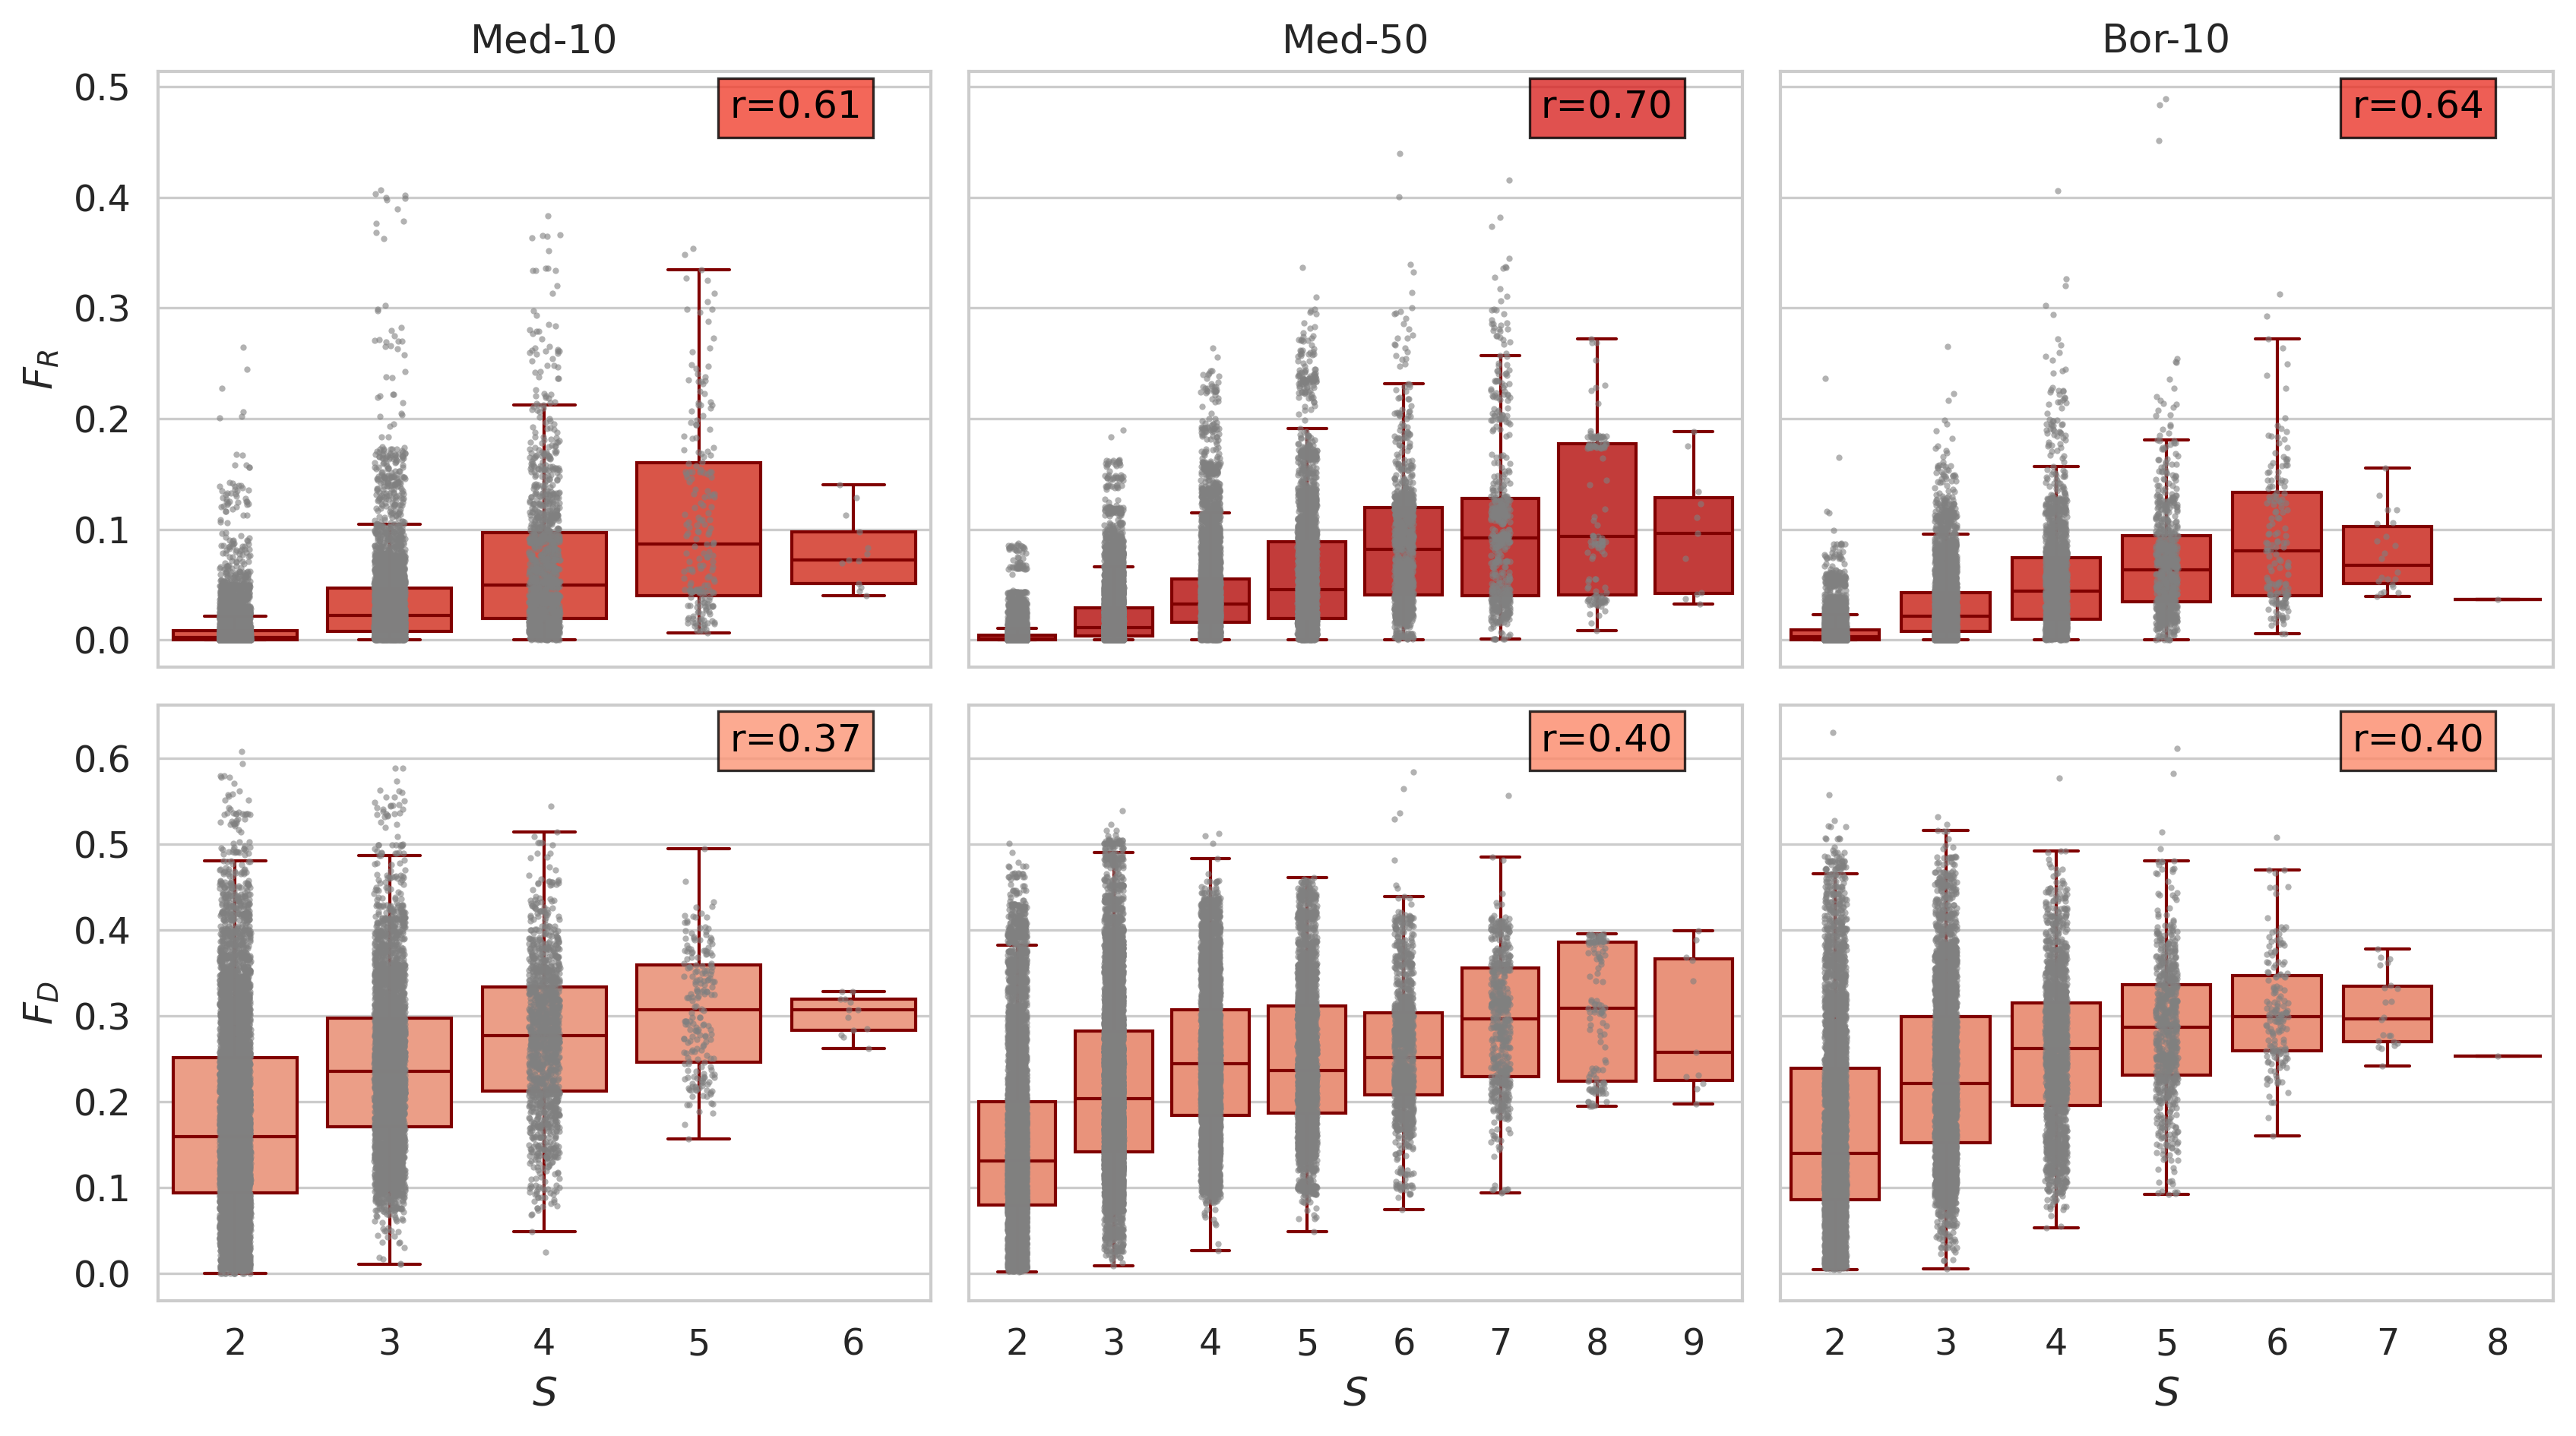

In [27]:
# Set up color map and normalization
cmap_corr = mpl.colormaps['Reds']
norm_corr = mpl.colors.Normalize(vmin=0.0, vmax=1.0, clip=True)
met_corr = 'spearman'

# Load data
data = pd.read_csv(os.path.join(fpath_dir, 'coms-fire-bioindex-fd.csv'))
df = data[(data['biome']=='med') & (data['N']==10)].set_index(['N', 'ncom', 'init']).drop(columns='Unnamed: 0')
d1 = df[(df['srichness']>1)].iloc[:,2:].rename(columns={'srichness':'$S$', 'isimpson':'$I$', 'frichness':'$F_R$', 'fdivergence':'$F_D$'})
df = data[(data['biome']=='med') & (data['N']==50)].set_index(['N', 'ncom', 'init']).drop(columns='Unnamed: 0')
d2 = df[(df['srichness']>1)].iloc[:,2:].rename(columns={'srichness':'$S$', 'isimpson':'$I$', 'frichness':'$F_R$', 'fdivergence':'$F_D$'})
df = data[(data['biome']=='bor') & (data['N']==10)].set_index(['N', 'ncom', 'init']).drop(columns='Unnamed: 0')
d3 = df[(df['srichness']>1)].iloc[:,2:].rename(columns={'srichness':'$S$', 'isimpson':'$I$', 'frichness':'$F_R$', 'fdivergence':'$F_D$'})

# Variables to plot
x_vars = ["$S$"]
y_vars = ["$F_R$", "$F_D$"]

# Create the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7), sharex='col', sharey='row', dpi=dpi)

# Plot the first dataset
for i, y_var in enumerate(y_vars):
    ax = axes[i, 0]
    # sns.boxplot(x="$S$", y=y_var, data=d1, ax=ax, color='red')
    # sns.stripplot(x="$S$", y=y_var, data=d1, color="grey", alpha=0.7, size=2, ax=ax)
    corr_box(ax, d1["$S$"], d1[y_var], met_corr, cmap_corr, norm_corr)
axes[0,0].set_title("Med-10")

# Plot the second dataset
for i, y_var in enumerate(y_vars):
    ax = axes[i, 1]
    corr_box(ax, d2["$S$"], d2[y_var], met_corr, cmap_corr, norm_corr)
    # ax.set_xticks(np.arange(1,11,2))
axes[0,1].set_title("Med-50")

for i, y_var in enumerate(y_vars):
    ax = axes[i, 2]
    corr_box(ax, d3["$S$"], d3[y_var], met_corr, cmap_corr, norm_corr)
axes[0,2].set_title("Bor-10")

for ax in axes.flatten():
    ax.label_outer()

# Add a shared colorbar
# cbar_ax = fig.add_axes([0.9, 0.2, 0.03, 0.6])  # [left, bottom, width, height]
# sm = ScalarMappable(norm=norm_corr, cmap=cmap_corr)
# cbar = fig.colorbar(sm, cax=cbar_ax)
# cbar.set_label("Pearson Correlation Coefficient", rotation=270, labelpad=15)

# Adjust layout
# plt.tight_layout()
plt.tight_layout(w_pad=0.4, h_pad=0.4)
plt.savefig("figure4.png", bbox_inches="tight", dpi=dpi, transparent=transparent)

In [ ]:
cmap_corr = mpl.colormaps['Reds']
norm_corr = mpl.colors.Normalize(vmin=0.0, vmax=1.0, clip=True)

def corrfunc(x, y, **kwds):
    cmap = kwds['cmap']
    norm = kwds['norm']
    
    ax = plt.gca()
    r, pval = scs.spearmanr(x, y)
    
    # Set the regression line color dynamically based on correlation
    line_color = cmap(norm(r))  # Match line color with heatmap color
    sns.scatterplot(x=x, y=y, ax=ax, size=5, color='grey', alpha=0.6)
    
    if pval < 0.001:
        # Add annotation in the upper-left corner
        bbox_props = dict(boxstyle="square", edgecolor="black", facecolor=line_color, alpha=0.8)
        ax.annotate(f"r={r:.2f}", xy=(0.74, 0.97), xycoords='axes fraction', color='black', size=12, ha='left', va='top', bbox=bbox_props)
    
# sns.set_theme(context="paper", style="white", font_scale=1.5, rc={"lines.linewidth": 2})

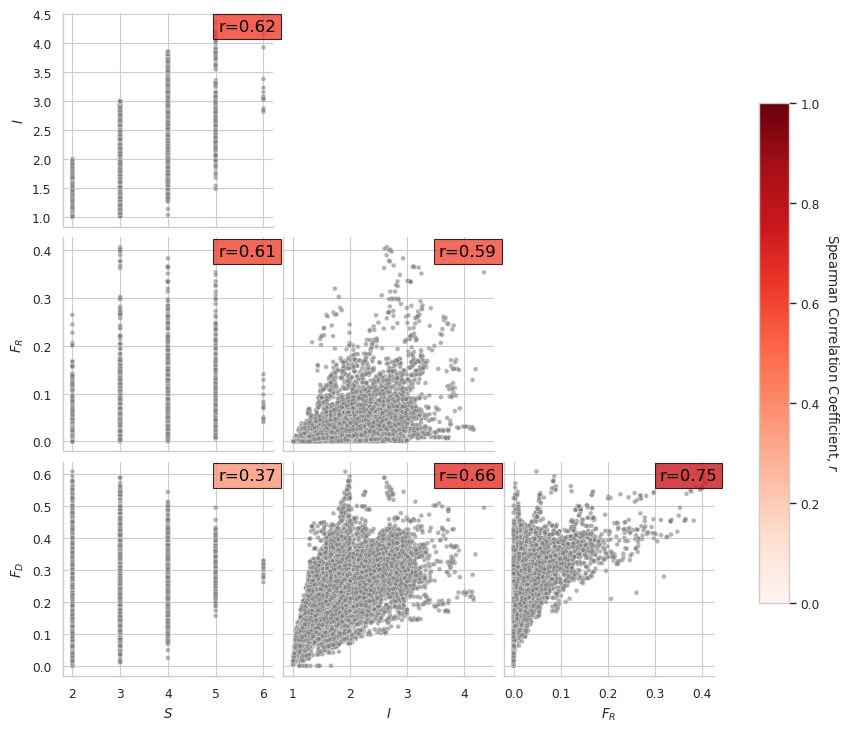

In [23]:
data = pd.read_csv(os.path.join(fpath_dir, 'coms-fire-bioindex-fd.csv'))
df = data[(data['biome']=='med') & (data['N']==10)].set_index(['N', 'ncom', 'init']).drop(columns='Unnamed: 0')
d1 = df[(df['srichness']>1)].iloc[:,3:].rename(columns={'srichness':'$S$', 'isimpson':'$I$', 'frichness':'$F_R$', 'fdivergence':'$F_D$'})

g = sns.PairGrid(d1)
g.map_lower(corrfunc, cmap=cmap_corr, norm=norm_corr)

# Remove diagonal and upper triangle by hiding the axes
for i in range(len(d1.columns)):
    for j in range(len(d1.columns)):
        if i <= j:  # Diagonal and upper triangle
            g.axes[i, j].set_visible(False)

# Add colorbar
fig = g.fig
cbar_ax = fig.add_axes([0.78, 0.15, 0.03, 0.5])  # [left, bottom, width, height] in figure coordinates
sm = ScalarMappable(norm=norm_corr, cmap=cmap_corr)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Spearman Correlation Coefficient, $r$", rotation=270, labelpad=15)

# g.figure.suptitle('Med-10')
g.fig.subplots_adjust(wspace=0.05, hspace=0.05)

plt.savefig("corr_med10.png", bbox_inches="tight", dpi=dpi, transparent=transparent)

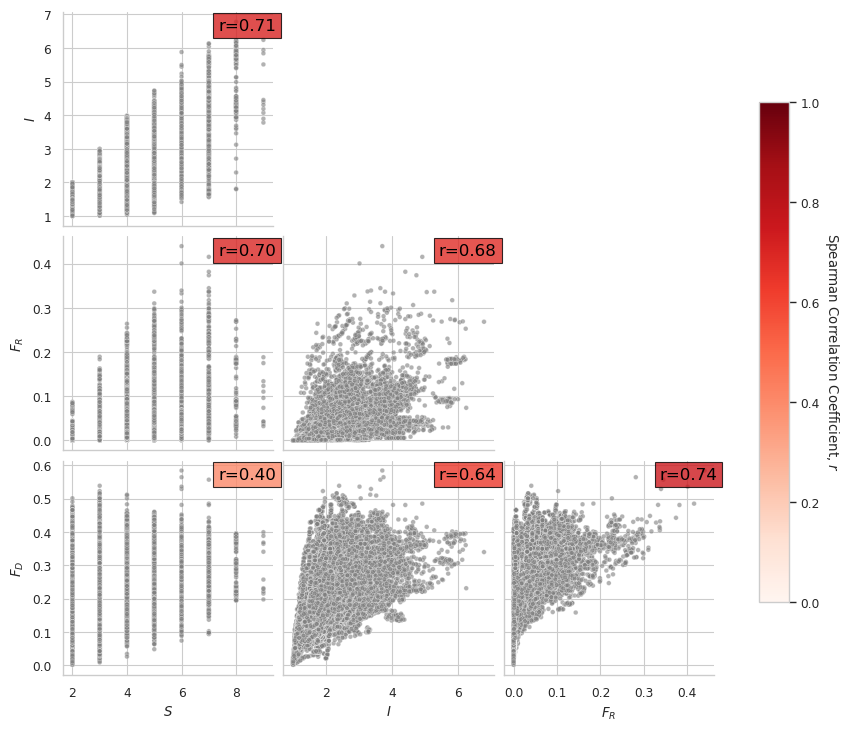

In [24]:
data = pd.read_csv(os.path.join(fpath_dir, 'coms-fire-bioindex-fd.csv'))
df = data[(data['biome']=='med') & (data['N']==50)].set_index(['N', 'ncom', 'init']).drop(columns='Unnamed: 0')
d1 = df[(df['srichness']>1)].iloc[:,3:].rename(columns={'srichness':'$S$', 'isimpson':'$I$', 'frichness':'$F_R$', 'fdivergence':'$F_D$'})

g = sns.PairGrid(d1)
g.map_lower(corrfunc, cmap=cmap_corr, norm=norm_corr)

# Remove diagonal and upper triangle by hiding the axes
for i in range(len(d1.columns)):
    for j in range(len(d1.columns)):
        if i <= j:  # Diagonal and upper triangle
            g.axes[i, j].set_visible(False)

# Add colorbar
fig = g.fig
cbar_ax = fig.add_axes([0.78, 0.15, 0.03, 0.5])  # [left, bottom, width, height] in figure coordinates
sm = ScalarMappable(norm=norm_corr, cmap=cmap_corr)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Spearman Correlation Coefficient, $r$", rotation=270, labelpad=15)

# g.figure.suptitle('Med-10')
g.fig.subplots_adjust(wspace=0.05, hspace=0.05)

plt.savefig("corr_med50.png", bbox_inches="tight", dpi=dpi, transparent=transparent)

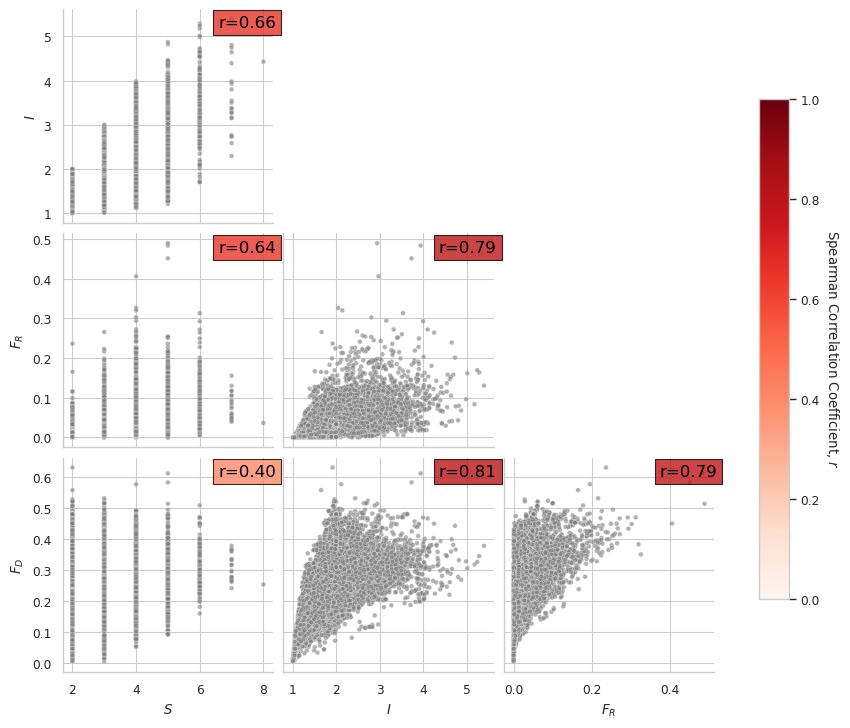

In [25]:
data = pd.read_csv(os.path.join(fpath_dir, 'coms-fire-bioindex-fd.csv'))
df = data[(data['biome']=='bor') & (data['N']==10)].set_index(['N', 'ncom', 'init']).drop(columns='Unnamed: 0')
d1 = df[(df['srichness']>1)].iloc[:,3:].rename(columns={'srichness':'$S$', 'isimpson':'$I$', 'frichness':'$F_R$', 'fdivergence':'$F_D$'})

g = sns.PairGrid(d1)
g.map_lower(corrfunc, cmap=cmap_corr, norm=norm_corr)

# Remove diagonal and upper triangle by hiding the axes
for i in range(len(d1.columns)):
    for j in range(len(d1.columns)):
        if i <= j:  # Diagonal and upper triangle
            g.axes[i, j].set_visible(False)

# Add colorbar
fig = g.fig
cbar_ax = fig.add_axes([0.78, 0.15, 0.03, 0.5])  # [left, bottom, width, height] in figure coordinates
sm = ScalarMappable(norm=norm_corr, cmap=cmap_corr)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Spearman Correlation Coefficient, $r$", rotation=270, labelpad=15)

# g.figure.suptitle('Med-10')
g.fig.subplots_adjust(wspace=0.05, hspace=0.05)

plt.savefig("corr_bor10.png", bbox_inches="tight", dpi=dpi, transparent=transparent)

### Med50: Include Annuals

In [23]:
df2 = pd.read_csv(os.path.join(fpath_dir, 'coms-fire-bioindex-fd.csv'))
df2['frt']=np.log10(df2['frt'])
df2['gen']='No Annuals'

fpath_exp = "/work/users/mtorrassa/biofire-idh/data_new2/"
df4 = pd.read_csv(os.path.join(fpath_exp, 'coms-fire-bioindex-fd.csv'))
df4['frt']=np.log10(df4['frt'])
df4['gen']='Annuals'

In [24]:
df4['frichness'].median()

0.02453528622792165

In [25]:
colors2= ['#E1BE6A', '#40B0A6']
# colors2= ['#E66100', '#5D3A9B']
sz = 5
al = 0.6

frt_max = 1900
frt_min = 4

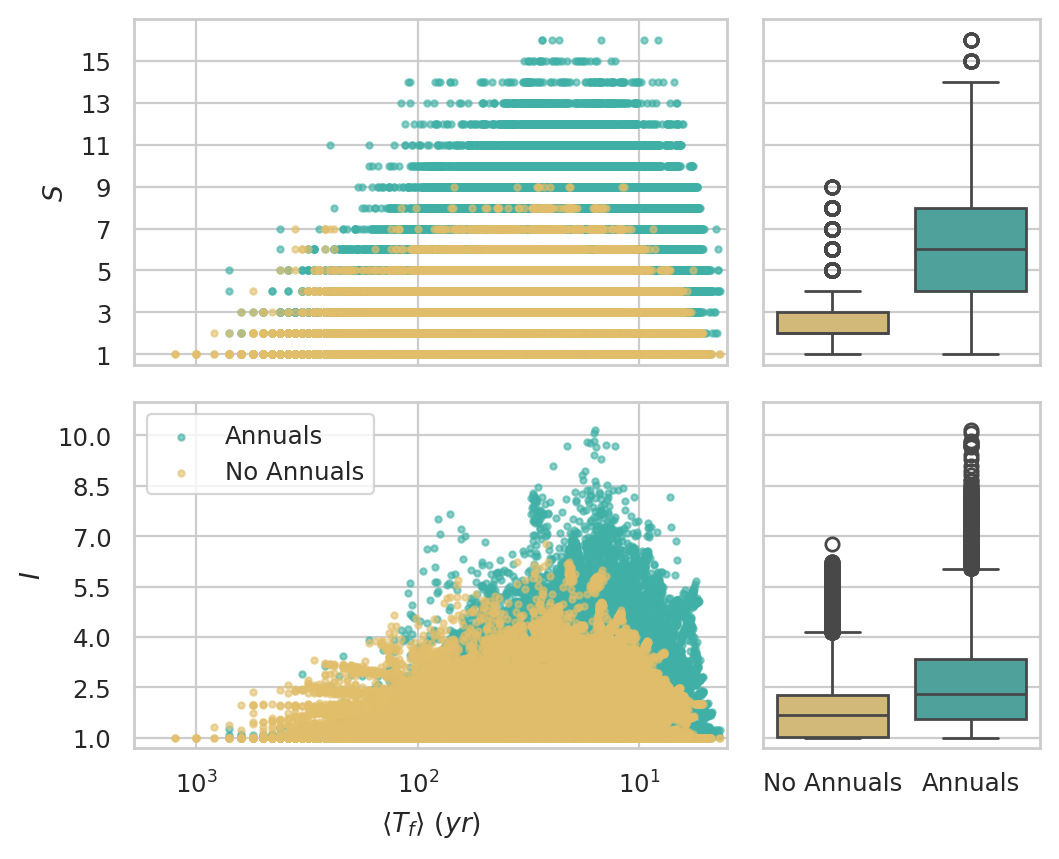

In [12]:
fig, ax2 = plt.subplots(2,2, figsize=(6,5), sharey='row', dpi=200, gridspec_kw={'width_ratios': [3, 1.4]})

n=50
biome='med'

data = df4[(df4['N'] == n) & (df4['biome'] == biome)]
ax2[0,0].scatter('frt', 'srichness', data=data, s=sz, alpha=al, c=colors2[1], label='Annuals')
ax2[1,0].scatter('frt', 'isimpson', data=data, s=sz, alpha=al, c=colors2[1], label='Annuals')

data = df2[(df2['N'] == n) & (df2['biome'] == biome)]
ax2[0,0].scatter('frt', 'srichness', data=data, s=sz, alpha=al, c=colors2[0], label='No Annuals')
ax2[1,0].scatter('frt', 'isimpson', data=data, s=sz, alpha=al, c=colors2[0], label='No Annuals')

ax2[1,0].set_xlabel(r"$\langle T_f \rangle$ ($yr$)")

data = pd.concat([df2, df4])
sns.boxplot(x='gen', y='srichness', data=data, ax=ax2[0,1], palette=colors2, hue='gen')
sns.boxplot(x='gen', y='isimpson', data=data, ax=ax2[1,1], palette=colors2, hue='gen')

for ax in ax2[:,0]:
    ax.invert_xaxis()
    ax.set(xlim=(np.log10(frt_max),np.log10(frt_min)))
    ticks = [1, 2, 3]
    ax.set_xticks(ticks)
    ax.set_xticklabels([fr'$10^{i}$' for i in ticks])

for ax in ax2[:,1]:
    ax.set_xlabel("")

for ax in ax2[0]:
    ax.set_yticks(np.arange(1.0, 17.0, 2))
    ax.set_ylim([0.5,17.0])
    ax.set_ylabel("$S$")

for ax in ax2[1]:
    ax.set_yticks(np.arange(1.0, 11.0, 1.5))
    ax.set_ylim([0.7,11.0])
    ax.set_ylabel("$I$")

for ax in ax2.flatten():
    ax.label_outer()

# ax2[1,0].legend(bbox_to_anchor=(1.15, 1), loc="upper left", borderaxespad=0)
ax2[1,0].legend()

plt.tight_layout(w_pad=0.4, h_pad=0.4)
plt.savefig("figure6.png", bbox_inches="tight", dpi=dpi, transparent=transparent)

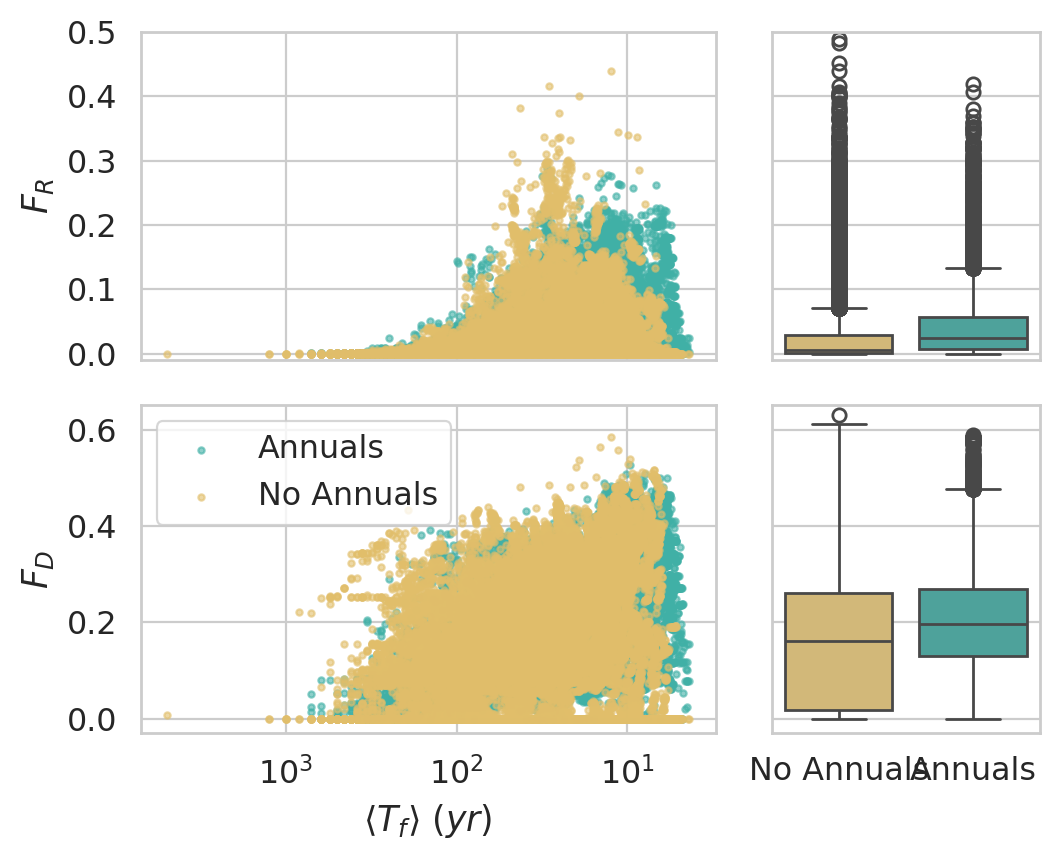

In [28]:
fig, ax2 = plt.subplots(2,2, figsize=(6,5), sharey='row', dpi=200, gridspec_kw={'width_ratios': [3, 1.4]})

n=50
biome='med'

data = df4[(df4['N'] == n) & (df4['biome'] == biome)]
ax2[0,0].scatter('frt', 'frichness', data=data, s=sz, alpha=al, c=colors2[1], label='Annuals')
ax2[1,0].scatter('frt', 'fdivergence', data=data, s=sz, alpha=al, c=colors2[1], label='Annuals')

data = df2[(df2['N'] == n) & (df2['biome'] == biome)]
ax2[0,0].scatter('frt', 'frichness', data=data, s=sz, alpha=al, c=colors2[0], label='No Annuals')
ax2[1,0].scatter('frt', 'fdivergence', data=data, s=sz, alpha=al, c=colors2[0], label='No Annuals')

ax2[1,0].set_xlabel(r"$\langle T_f \rangle$ ($yr$)")

data = pd.concat([df2, df4])
sns.boxplot(x='gen', y='frichness', data=data, ax=ax2[0,1], palette=colors2, hue='gen')
sns.boxplot(x='gen', y='fdivergence', data=data, ax=ax2[1,1], palette=colors2, hue='gen')

for ax in ax2[:,0]:
    ax.invert_xaxis()
    # ax.set(xlim=(np.log10(frt_max),np.log10(frt_min)))
    ticks = [1, 2, 3]
    ax.set_xticks(ticks)
    ax.set_xticklabels([fr'$10^{i}$' for i in ticks])

for ax in ax2[:,1]:
    ax.set_xlabel("")

for ax in ax2[0]:
    ax.set_yticks(np.arange(0.0, 0.51, 0.1))
    ax.set_ylim([-0.01,0.5])
    ax.set_ylabel("$F_R$")

for ax in ax2[1]:
    ax.set_yticks(np.arange(0.0, 0.7, 0.2))
    ax.set_ylim([-0.03,0.65])
    ax.set_ylabel("$F_D$")

for ax in ax2.flatten():
    ax.label_outer()

# ax2[1,0].legend(bbox_to_anchor=(1.15, 1), loc="upper left", borderaxespad=0)
ax2[1,0].legend()

plt.tight_layout(w_pad=0.4, h_pad=0.4)
# plt.savefig("figure6_2.png", bbox_inches="tight", dpi=dpi, transparent=transparent)